# Importing Neccessary Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal

In [291]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
welch = signal.welch

# Loading the Datasets

In [7]:
asphalt_df = pd.read_csv('../datasets/final/AFW.csv')

concrete_df = pd.read_csv('../datasets/final/CFD.csv')

grass_df = pd.read_csv('../datasets/final/GSW.csv')

stones_df = pd.read_csv('../datasets/final/SCW.csv')

tiles_df = pd.read_csv('../datasets/final/TS.csv')

# Creating new data sets to enhance exploration

We will also find the magnitude of the accelerometer and gyroscope readings and see what analysis on those give

In [8]:
data_frames = [asphalt_df, concrete_df, grass_df, stones_df, tiles_df]
magnitude_dfs = []

for df in data_frames:
    new_df = pd.DataFrame()
    new_df['accel_mag'] = np.sqrt(df['x accelerometer']**2 + df['y accelerometer']**2 + df['z accelerometer']**2)
    new_df['gyro_mag'] = np.sqrt(df['x gyro']**2 + df['y gyro']**2 + df['z gyro']**2)
    magnitude_dfs.append(new_df)

mag_asphalt = magnitude_dfs[0]
mag_concrete = magnitude_dfs[1]
mag_grass = magnitude_dfs[2]
mag_stones = magnitude_dfs[3]
mag_tiles = magnitude_dfs[4]

# Getting Highlevel information

In [9]:
asphalt_df.info()
asphalt_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15982 entries, 0 to 15981
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x accelerometer  15982 non-null  float64
 1   y accelerometer  15982 non-null  float64
 2   z accelerometer  15982 non-null  float64
 3   x gyro           15982 non-null  float64
 4   y gyro           15982 non-null  float64
 5   z gyro           15982 non-null  float64
 6   surface          15982 non-null  object 
dtypes: float64(6), object(1)
memory usage: 874.1+ KB


x accelerometer  y accelerometer  z accelerometer        x gyro  \
count     15982.000000     15982.000000     15982.000000  15982.000000   
mean          0.008560        -0.043895        -1.008299      0.714766   
std           0.127686         0.089763         0.143952      2.770267   
min          -0.905029        -0.731201        -1.895752    -18.646240   
25%          -0.066650        -0.095215        -1.092041     -0.900268   
50%           0.009277        -0.050049        -1.008057      0.717163   
75%           0.083008         0.012695        -0.926514      2.426147   
max           1.026123         0.496582        -0.208984     16.006470   

             y gyro        z gyro  
count  15982.000000  15982.000000  
mean       0.248855      0.165666  
std        2.007865      3.252399  
min      -14.160155    -15.014647  
25%       -0.930786     -1.815796  
50%        0.259399      0.122070  
75%        1.419067      2.136230  
max       14.221190     15.960692

In [209]:
mag_asphalt.describe()

accel_mag      gyro_mag
count  15982.000000  15982.000000
mean       1.021376      4.191618
std        0.143321      2.305112
min        0.333354      0.123021
25%        0.937736      2.586489
50%        1.012330      3.936280
75%        1.103878      5.522143
max        1.933031     22.018427

In [210]:
concrete_df.info()
concrete_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14802 entries, 0 to 14801
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x accelerometer  14802 non-null  float64
 1   y accelerometer  14802 non-null  float64
 2   z accelerometer  14802 non-null  float64
 3   x gyro           14802 non-null  float64
 4   y gyro           14802 non-null  float64
 5   z gyro           14802 non-null  float64
 6   surface          14802 non-null  object 
dtypes: float64(6), object(1)
memory usage: 809.6+ KB


x accelerometer  y accelerometer  z accelerometer        x gyro  \
count     14802.000000     14802.000000     14802.000000  14802.000000   
mean         -0.008975        -0.040968        -1.008083      0.691634   
std           0.130861         0.088410         0.146810      2.702603   
min          -0.909912        -0.755615        -2.094482    -27.130125   
25%          -0.080322        -0.087891        -1.083252     -0.579834   
50%          -0.008789        -0.039795        -1.007813      0.762939   
75%           0.062500         0.008057        -0.932190      2.105713   
max           0.847412         0.484375        -0.100342     15.365600   

             y gyro        z gyro  
count  14802.000000  14802.000000  
mean       0.252697      0.102785  
std        1.946239      2.955007  
min      -15.274047    -14.862060  
25%       -0.640869     -1.831055  
50%        0.259399     -0.030518  
75%        1.174927      1.922607  
max       14.694213     12.084960

In [211]:
mag_concrete.describe()

accel_mag      gyro_mag
count  14802.000000  14802.000000
mean       1.021425      3.868675
std        0.145512      2.325755
min        0.259486      0.037377
25%        0.942303      2.249870
50%        1.016128      3.439224
75%        1.092958      4.947761
max        2.098581     27.375550

In [212]:
grass_df.info()
grass_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13343 entries, 0 to 13342
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x accelerometer  13343 non-null  float64
 1   y accelerometer  13343 non-null  float64
 2   z accelerometer  13343 non-null  float64
 3   x gyro           13343 non-null  float64
 4   y gyro           13343 non-null  float64
 5   z gyro           13343 non-null  float64
 6   surface          13343 non-null  object 
dtypes: float64(6), object(1)
memory usage: 729.8+ KB


x accelerometer  y accelerometer  z accelerometer        x gyro  \
count     13343.000000     13343.000000     13343.000000  13343.000000   
mean         -0.015268        -0.246764        -0.977596      0.502482   
std           0.107228         0.143185         0.162166      9.439054   
min          -0.874756        -1.190186        -2.301758    -54.412838   
25%          -0.069092        -0.347046        -1.051514     -4.676818   
50%          -0.016846        -0.239990        -0.964844      1.266479   
75%           0.038574        -0.145020        -0.893555      6.195068   
max           0.841797         0.424805        -0.195313     38.436890   

             y gyro        z gyro  
count  13343.000000  13343.000000  
mean       0.293958     -0.033588  
std        5.945142      6.308783  
min      -35.552979    -25.634764  
25%       -3.051758     -4.196167  
50%        0.259399      0.000000  
75%        3.654479      4.028320  
max       31.112669     30.441282

In [213]:
mag_grass.describe()

accel_mag      gyro_mag
count  13343.000000  13343.000000
mean       1.024909     11.160536
std        0.157089      6.325691
min        0.225849      0.278447
25%        0.947332      6.562849
50%        1.013478      9.961383
75%        1.089665     14.476883
max        2.316651     55.656314

In [214]:
stones_df.info()
stones_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16224 entries, 0 to 16223
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x accelerometer  16224 non-null  float64
 1   y accelerometer  16224 non-null  float64
 2   z accelerometer  16224 non-null  float64
 3   x gyro           16224 non-null  float64
 4   y gyro           16224 non-null  float64
 5   z gyro           16224 non-null  float64
 6   surface          16224 non-null  object 
dtypes: float64(6), object(1)
memory usage: 887.4+ KB


x accelerometer  y accelerometer  z accelerometer        x gyro  \
count     16224.000000     16224.000000     16224.000000  16224.000000   
mean         -0.067117        -0.093431        -1.001502      0.546592   
std           0.091327         0.089733         0.085316      6.434623   
min          -0.556641        -0.681396        -1.625244    -43.365475   
25%          -0.120361        -0.143555        -1.049072     -2.426147   
50%          -0.068604        -0.090332        -1.000000      0.793457   
75%          -0.012451        -0.037842        -0.952393      4.074097   
max           0.549316         0.534912        -0.208008     35.675049   

             y gyro        z gyro  
count  16224.000000  16224.000000  
mean       0.203465      0.079315  
std        5.119537     11.477493  
min      -32.592773    -66.802979  
25%       -2.044678     -4.673004  
50%        0.213623      0.091553  
75%        2.517700      4.760742  
max       47.164913     81.130974

In [215]:
mag_stones.describe()

accel_mag      gyro_mag
count  16224.000000  16224.000000
mean       1.016129     10.605186
std        0.085975      9.338974
min        0.519965      0.103490
25%        0.966625      5.115291
50%        1.013929      8.066431
75%        1.063099     12.524788
max        1.660164     91.487770

In [216]:
tiles_df.info()
tiles_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12380 entries, 0 to 12379
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x accelerometer  12380 non-null  float64
 1   y accelerometer  12380 non-null  float64
 2   z accelerometer  12380 non-null  float64
 3   x gyro           12380 non-null  float64
 4   y gyro           12380 non-null  float64
 5   z gyro           12380 non-null  float64
 6   surface          12380 non-null  object 
dtypes: float64(6), object(1)
memory usage: 677.2+ KB


x accelerometer  y accelerometer  z accelerometer        x gyro  \
count     12380.000000     12380.000000     12380.000000  12380.000000   
mean         -0.004274        -0.042336        -1.007595      0.693141   
std           0.052843         0.040617         0.062145      1.037001   
min          -0.282715        -0.256836        -1.323486     -4.211426   
25%          -0.035156        -0.066650        -1.043701      0.061035   
50%          -0.004150        -0.041992        -1.008301      0.717163   
75%           0.027100        -0.017090        -0.972900      1.342773   
max           0.410645         0.242188        -0.521484      5.142211   

             y gyro        z gyro  
count  12380.000000  12380.000000  
mean       0.250807      0.032497  
std        0.723673      2.033406  
min       -5.035400     -8.758545  
25%       -0.198364     -1.296997  
50%        0.244141     -0.091553  
75%        0.686645      1.281738  
max        4.730225     10.391234

In [217]:
mag_tiles.describe()

accel_mag      gyro_mag
count  12380.000000  12380.000000
mean       1.010689      2.199444
std        0.062206      1.200133
min        0.555141      0.074753
25%        0.975582      1.340778
50%        1.010648      1.988068
75%        1.046508      2.794848
max        1.331939     10.556137

### Intepreting Descriptive Stats

The data actually corresponds well to expectations based on the difficulty in each surface.

Tiles showed the lowest mean and variability of accelerometer and gyroscope readings, reflecting the ease of traversing the surface.

Grass, which presented a mild difficulty to traverse due to its slopiness, has the highest mean gyroscope magnitude despite stones having the highest gyroscope magnitude overall. So while there might have been bursts of motion to traverse the difficult stone surface (leading to sudden spikes in angular velocity or something), the slopiness of the grass surface meant consistently higher gyroscope readings.

Stones show low variability in accelerometer readings (second only to tiles) but much higher gyroscope readings which indicate the difficulty in traversing such coarse terrain. 

While the average accelerometer reading for each surface is similar, the gyroscope readings see more variation apart from in the case of asphalt and conrete which are generally similar. 

For classification, random forest might actually be a viable approach because the problem might lend itself well to decision trees in the first place since, at a glance, you can think up classifications based on the range of the mean and standard deviation values.

# Checking for Missing Values

Due to how data was collected, missing values are not expected to be present

In [218]:
asphalt_df.isnull().sum()

x accelerometer    0
y accelerometer    0
z accelerometer    0
x gyro             0
y gyro             0
z gyro             0
surface            0
dtype: int64

In [219]:
concrete_df.isnull().sum()

x accelerometer    0
y accelerometer    0
z accelerometer    0
x gyro             0
y gyro             0
z gyro             0
surface            0
dtype: int64

In [220]:
grass_df.isnull().sum()

x accelerometer    0
y accelerometer    0
z accelerometer    0
x gyro             0
y gyro             0
z gyro             0
surface            0
dtype: int64

In [221]:
stones_df.isnull().sum()

x accelerometer    0
y accelerometer    0
z accelerometer    0
x gyro             0
y gyro             0
z gyro             0
surface            0
dtype: int64

In [222]:
tiles_df.isnull().sum()

x accelerometer    0
y accelerometer    0
z accelerometer    0
x gyro             0
y gyro             0
z gyro             0
surface            0
dtype: int64

# Checking for correlations

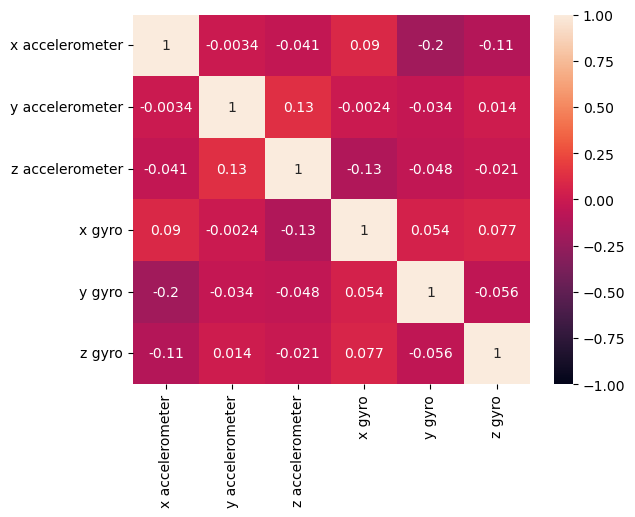

In [10]:
# asphalt_df.iloc[:, :6].corr()
sns.heatmap(asphalt_df.iloc[:, :6].corr(), annot = True, vmin= -1, vmax= 1)

# plt.rcParams['figure.figsize'] = (20, 7)

plt.show()

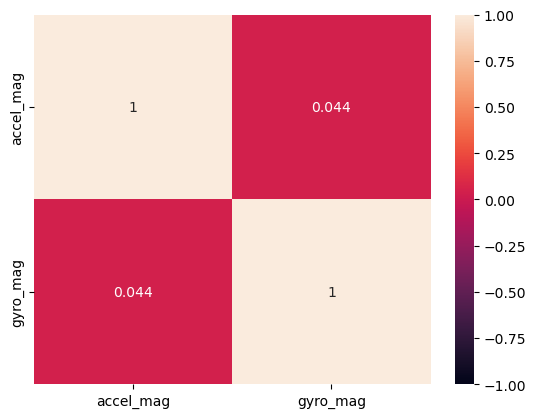

In [224]:
# mag_asphalt.corr()

sns.heatmap(mag_asphalt.corr(), annot = True, vmin=-1, vmax=1)

plt.show()

### Intepreting Correletion Results For Asphalt

There appears to be very little correlation between accelerometer and gyroscope readings. When split into their vector components the negligible correlation both in the positive and negative directions persist. The highest negative correlation is a weak one with a value of -0.2 and it exists between the y gyro and x accelerometer readings. While the highest positive correlation is also a weak one with a value of 0.13, exixting between the y and z accelerometer readings.

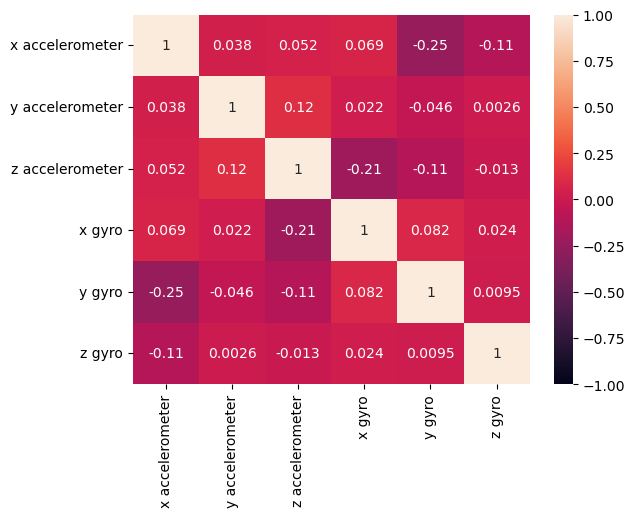

In [225]:
# concrete_df.iloc[:, :6].corr()

sns.heatmap(concrete_df.iloc[:, :6].corr(), annot = True, vmin=-1, vmax=1)

plt.show()

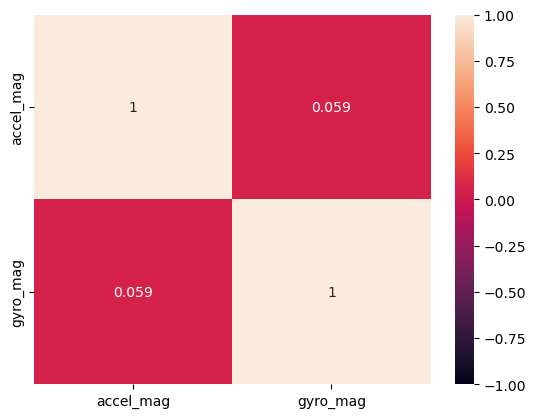

In [226]:
# mag_concrete.corr()

sns.heatmap(mag_concrete.corr(), annot = True, vmin=-1, vmax=1)

plt.show()

### Intepreting Correletion Results For Concrete

There appears to be very little correlation between accelerometer and gyroscope readings for concrete. When split into their vector components the negligible correlation both in the positive and negative directions persist. The highest negative correlation is a weak one with a value of -0.25 and it exists between the y gyro and x accelerometer readings. While the highest positive correlation is also a weak one with a value of 0.12, exixting between the y and z accelerometer readings.

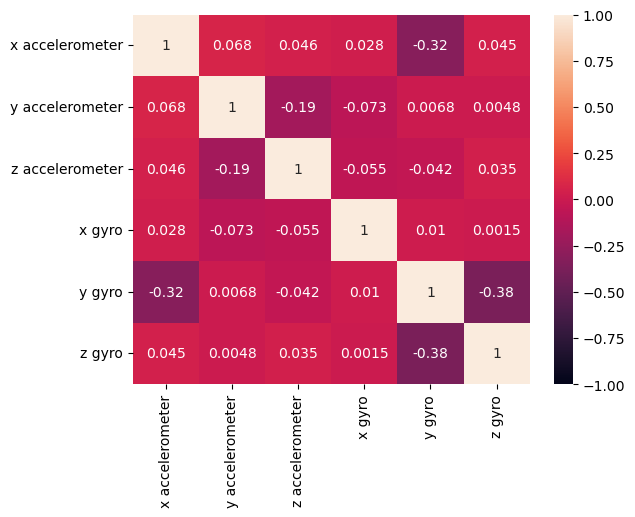

In [227]:
# grass_df.iloc[:, :6].corr()

sns.heatmap(grass_df.iloc[:, :6].corr(), annot = True, vmin=-1, vmax=1)

plt.show()

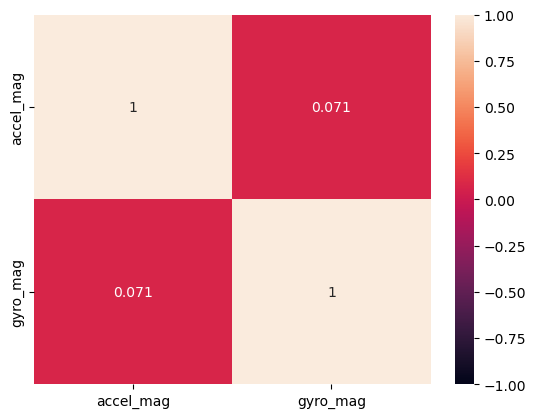

In [228]:
# mag_grass.corr()

sns.heatmap(mag_grass.corr(), annot = True, vmin=-1, vmax=1)

plt.show()

### Intepreting Correletion Results For Grass

There appears to be very little correlation between accelerometer and gyroscope readings for grass. When split into their vector components the negligible correlation both in the positive and negative directions persist. The highest negative correlation is a weak one with a value of -0.38 and it exists between the y gyro and z gyro readings. Interestingly, there is also a noticeable weak negative correlation with a value of -0.32 and it exists between the y gyro and x accelerometer readings. While the highest positive correlation is also a weak one with a value of 0.068, exixting between the y and x accelerometer readings.

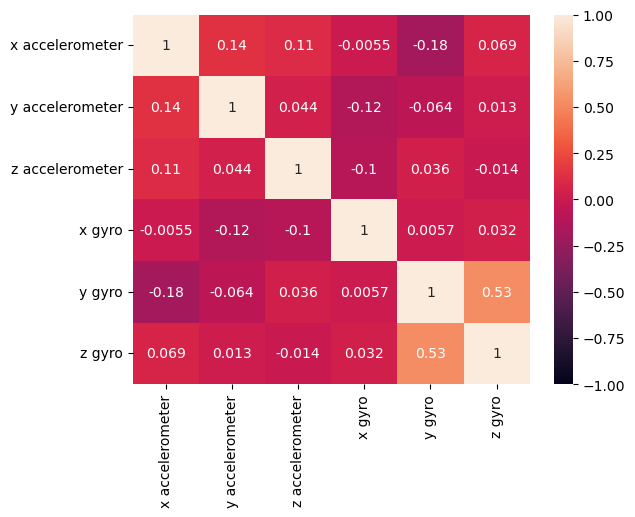

In [229]:
# stones_df.iloc[:, :6].corr()

sns.heatmap(stones_df.iloc[:, :6].corr(), annot= True, vmin=-1, vmax=1)

plt.show()

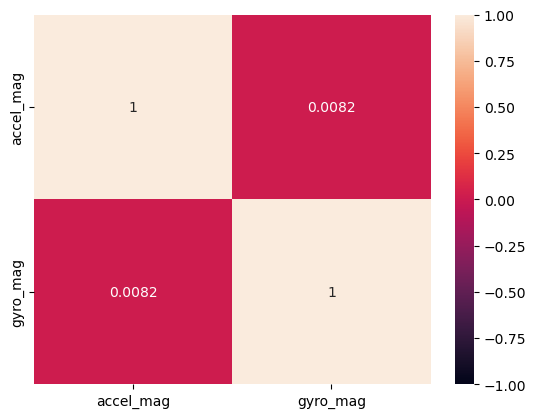

In [230]:
# mag_stones.corr()

sns.heatmap(mag_stones.corr(), annot= True, vmin=-1, vmax=1)

plt.show()

### Intepreting Correletion Results For Stones

There appears to be very little correlation between accelerometer and gyroscope readings for stones. When split into their vector components a fairly strong, positive correlation can be observed between y gyro and z gyro readings. The highest negative correlation is a weak one with a value of -0.18 and it exists between the y gyro and x accelerometer readings.

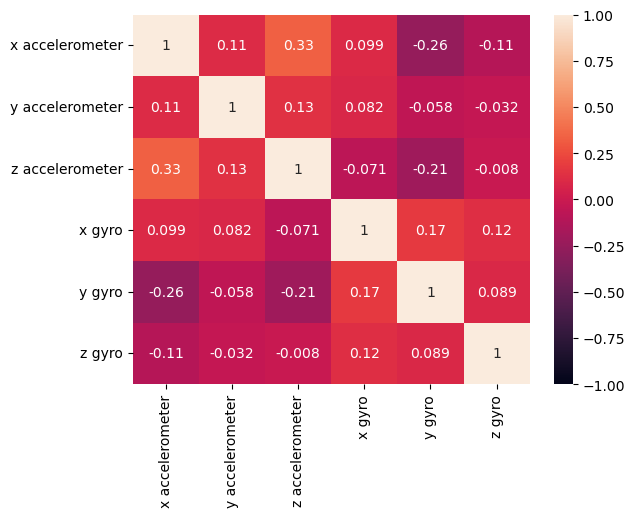

In [231]:
# tiles_df.iloc[:, :6].corr()

sns.heatmap(tiles_df.iloc[:, :6].corr(), annot= True, vmin=-1, vmax=1)

plt.show()

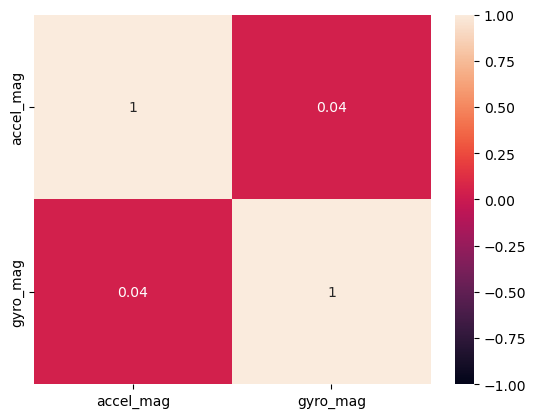

In [232]:
# mag_tiles.corr()

sns.heatmap(mag_tiles.corr(), annot=True, vmin=-1, vmax=1)

plt.show()

### Intepreting Correletion Results For Tiles

There appears to be very little correlation between accelerometer and gyroscope readings for tiles. When split into their vector components a weak positive correlation can be observed between z accelerometer and x accelerometer readings. The highest negative correlation is a weak one with a value of -0.26 and it exists between the y gyro and x accelerometer readings.

## General Conclusions from Correlation Matrixes of all surfaces

For the different surfaces, there generally seems to be no correlation between accelerometer and gyroscope readings. However, when you seperate the accelerometer and gyro readings into their vector components, there is consistently a weak negative correlation between the y gyroscope and x accelerometer readings. It's hard to tell why this happens. Maybe due to noise or human movement (as in, it's possible that certain actions may involve simultaneous movements that somehow result in a negative correlation between the x accelerometer and y gyro readings). In anycase, correlation doesn't seem to hold much significance to the problem of classification.

# Seeing the distribution of accelerometer and gyroscope magnitude readings all surfaces


### Asphalt

In [11]:
#Bushra Asphalt has 4872 rows no. 22
#Dayo Asphalt has 5901 rows no. 19
#Praise Asphalt has 5211 rows no. 15
#Concatenation order 15, 19, 22

asphalt_window1 = mag_asphalt[:150]  # sample first 1.5s from praise data
asphalt_window2 = mag_asphalt[5362:5512]  # sample next 1.5s from dayo data at 1.5s in
asphalt_window3 = mag_asphalt[11413:11563]  # sample next 1.5s from bushra data at 3.0s in

asphalt_data_slice = pd.concat([asphalt_window1, asphalt_window2, asphalt_window3], axis = 0)

asphalt_datasets = [asphalt_window1, asphalt_window2, asphalt_window3, asphalt_data_slice, mag_asphalt]
asphalt_titles = ["0-1.5s praise asphalt", "1.5-3.0s dayo asphalt", "3-4.5s bushra asphalt", "Data Slice", "Full asphalt dataset"]

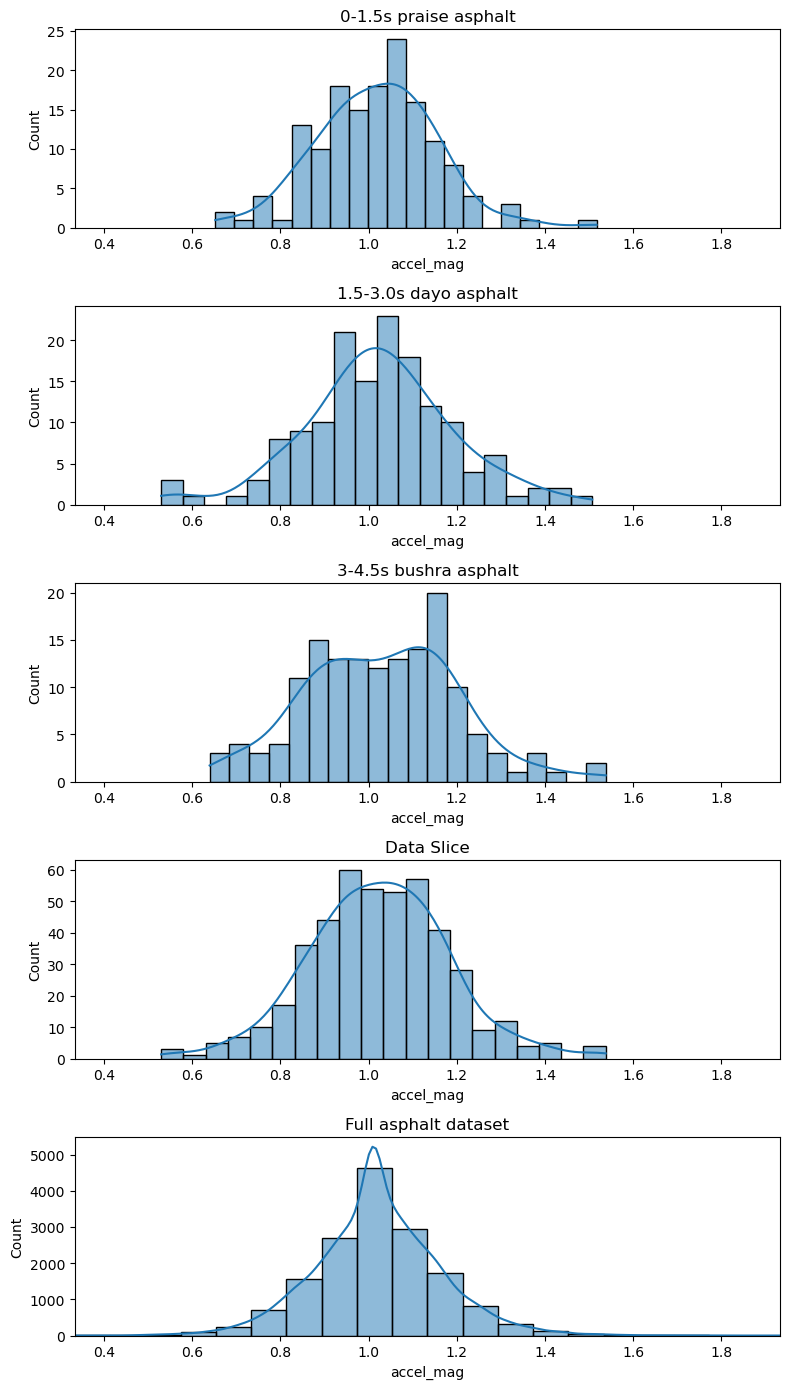

In [12]:
min_val = min([dataset['accel_mag'].min() for dataset in asphalt_datasets])
max_val = max([dataset['accel_mag'].max() for dataset in asphalt_datasets])

fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(8,14))

for i, dataset in enumerate(asphalt_datasets):
    ax = axis[i]
    sns.histplot(dataset['accel_mag'], kde=True, bins=20, ax=ax)
    ax.set_title(asphalt_titles[i])
    ax.set_xlim(min_val, max_val)

plt.tight_layout()
plt.show()

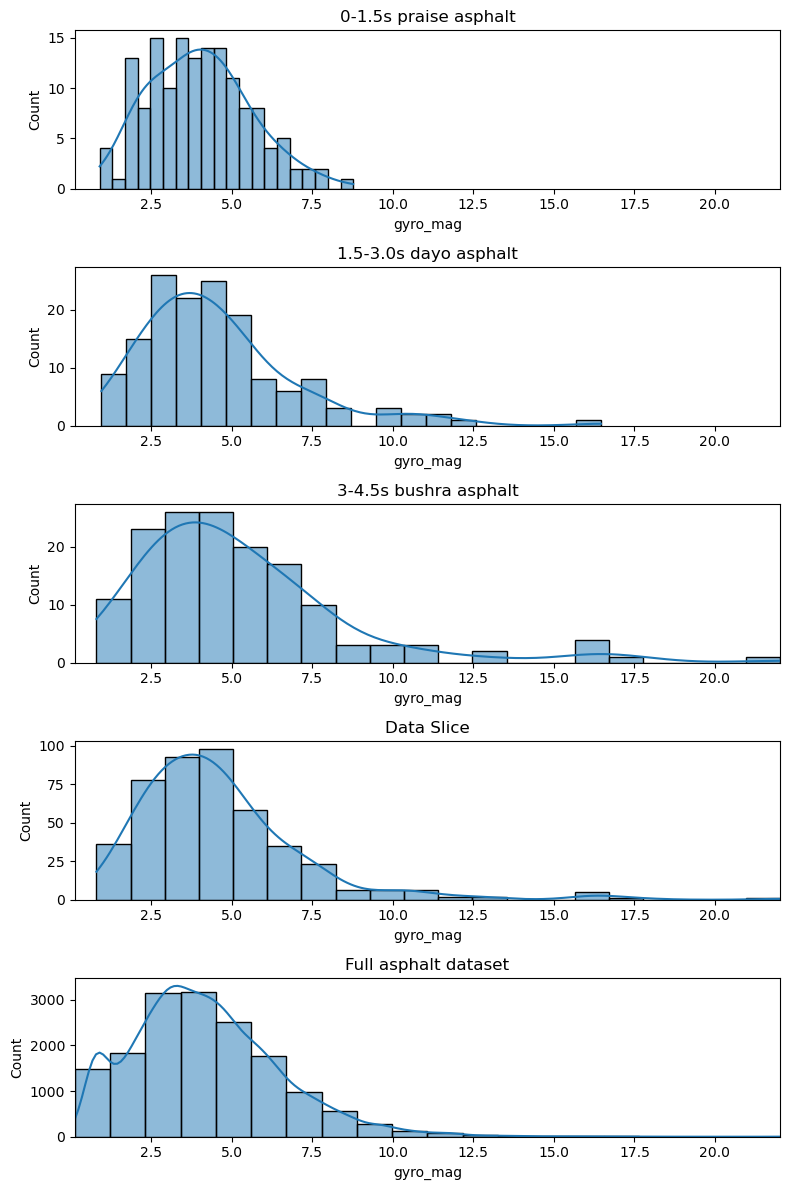

In [13]:
min_val = min([dataset['gyro_mag'].min() for dataset in asphalt_datasets])
max_val = max([dataset['gyro_mag'].max() for dataset in asphalt_datasets])

fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(8,12))

for i, dataset in enumerate(asphalt_datasets):
    ax = axis[i]
    sns.histplot(dataset['gyro_mag'], kde=True, bins=20, ax=ax)
    ax.set_title(asphalt_titles[i])
    ax.set_xlim(min_val, max_val)

plt.tight_layout()
plt.show()

### Concrete

In [14]:
#Bushra Concrete has 3993 rows no. 17
#Dayo Concrete has 5701 rows no. 13
#Praise Concrete has 5110 rows no. 20
#Concatenation order 13, 17, 20

concrete_window1 = mag_concrete[:150]  # sample first 1.5s from dayo data
concrete_window2 = mag_concrete[5852:6002]  # sample next 1.5s from bushra data at 1.5s in
concrete_window3 = mag_concrete[9995:10145]  # sample next 1.5s from praise data at 3.0s in

concrete_data_slice = pd.concat([concrete_window1, concrete_window2, concrete_window3], axis = 0)

concrete_datasets = [concrete_window1, concrete_window2, concrete_window3, concrete_data_slice, mag_concrete]
concrete_titles = ["0-1.5s dayo concrete", "1.5-3.0s bushra concrete", "3-4.5s praise concrete", "Data Slice", "Full concrete dataset"]

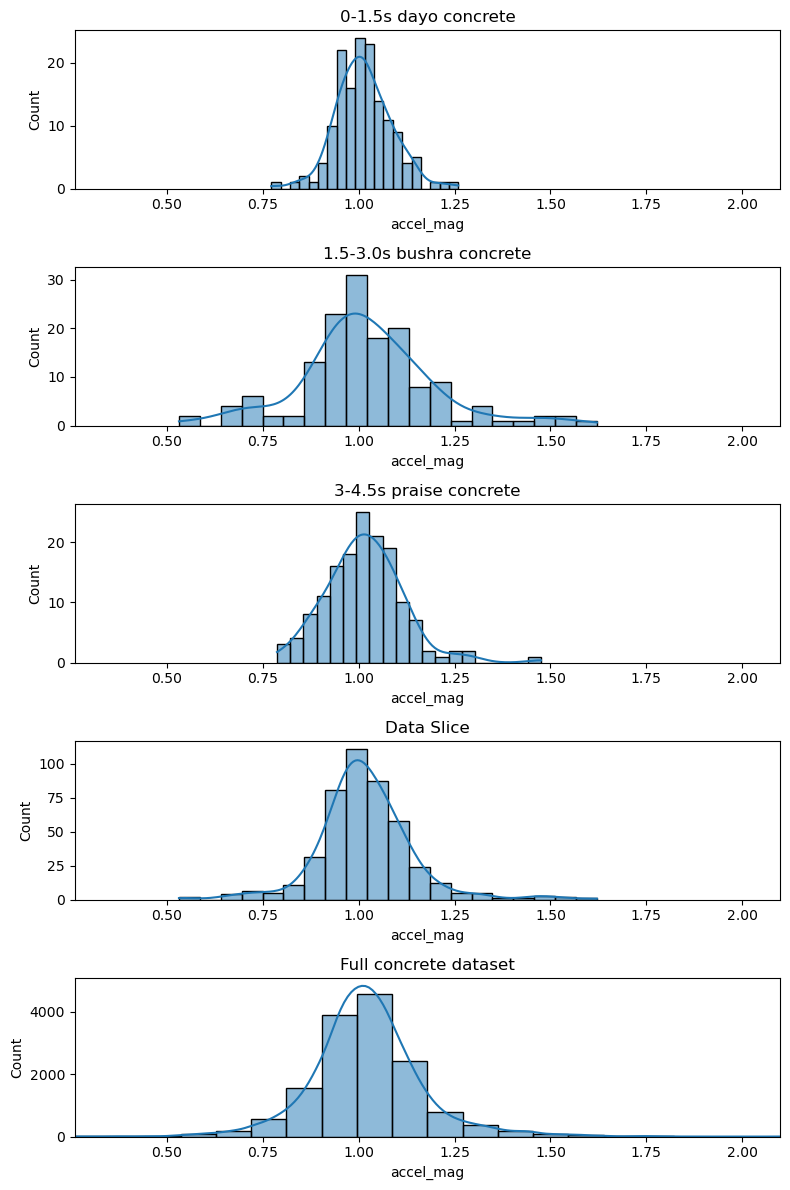

In [15]:
min_val = min([dataset['accel_mag'].min() for dataset in concrete_datasets])
max_val = max([dataset['accel_mag'].max() for dataset in concrete_datasets])

fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(8,12))

for i, dataset in enumerate(concrete_datasets):
    ax = axis[i]
    sns.histplot(dataset['accel_mag'], kde=True, bins=20, ax=ax)
    ax.set_title(concrete_titles[i])
    ax.set_xlim(min_val, max_val)

plt.tight_layout()
plt.show()

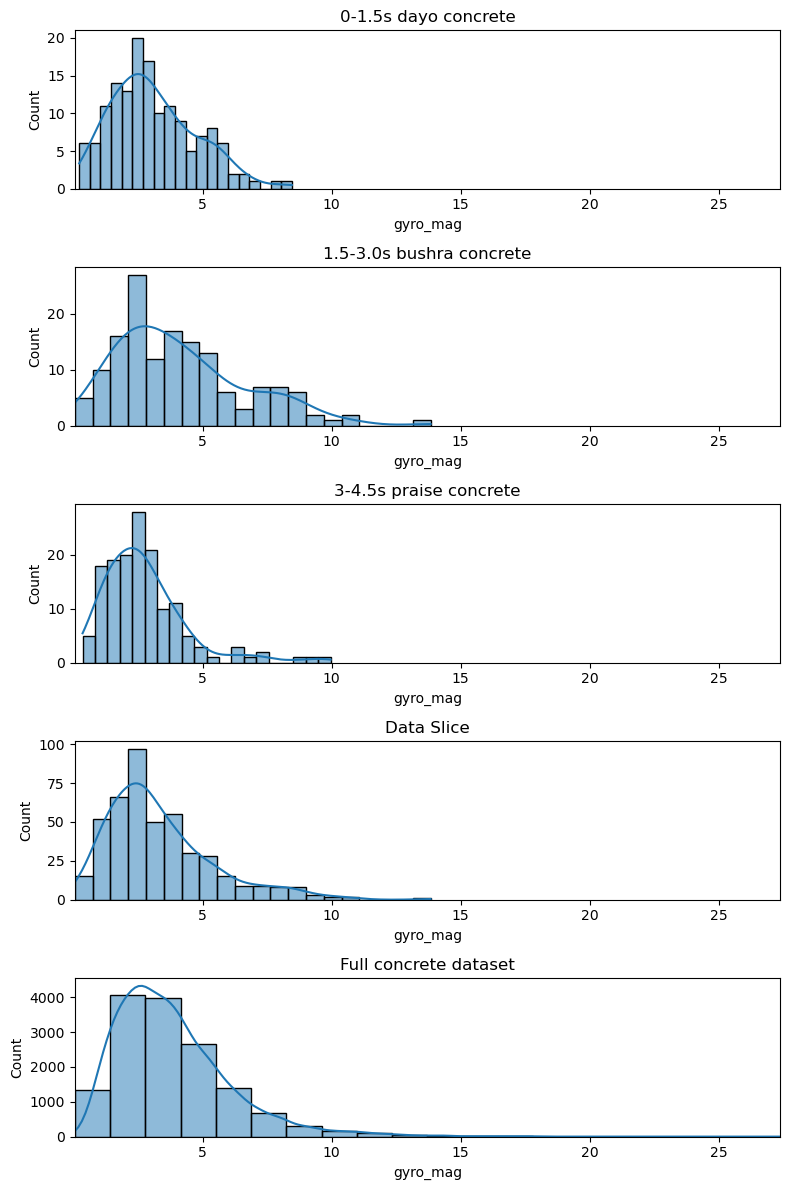

In [16]:
min_val = min([dataset['gyro_mag'].min() for dataset in concrete_datasets])
max_val = max([dataset['gyro_mag'].max() for dataset in concrete_datasets])

fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(8,12))

for i, dataset in enumerate(concrete_datasets):
    ax = axis[i]
    sns.histplot(dataset['gyro_mag'], kde=True, bins=20, ax=ax)
    ax.set_title(concrete_titles[i])
    ax.set_xlim(min_val, max_val)

plt.tight_layout()
plt.show()

### Grass

In [17]:
#Bushra Grass has 2032 rows no. 24
#Dayo Grass has 5601 rows no. 25
#Praise Grass has 5712 rows no. 23
#Concatenation order 23, 24, 25

grass_window1 = mag_grass[:150]  # sample first 1.5s from praise data
grass_window2 = mag_grass[5863:6013]  # sample next 1.5s from bushra data at 1.5s in
grass_window3 = mag_grass[8045:8194]  # sample next 1.5s from dayo data at 3.0s in

grass_data_slice = pd.concat([grass_window1, grass_window2, grass_window3], axis = 0)

grass_datasets = [grass_window1, grass_window2, grass_window3, grass_data_slice, mag_grass]
grass_titles = ["0-1.5s praise grass", "1.5-3.0s bushra grass", "3-4.5s dayo grass", "Data Slice", "Full grass dataset"]

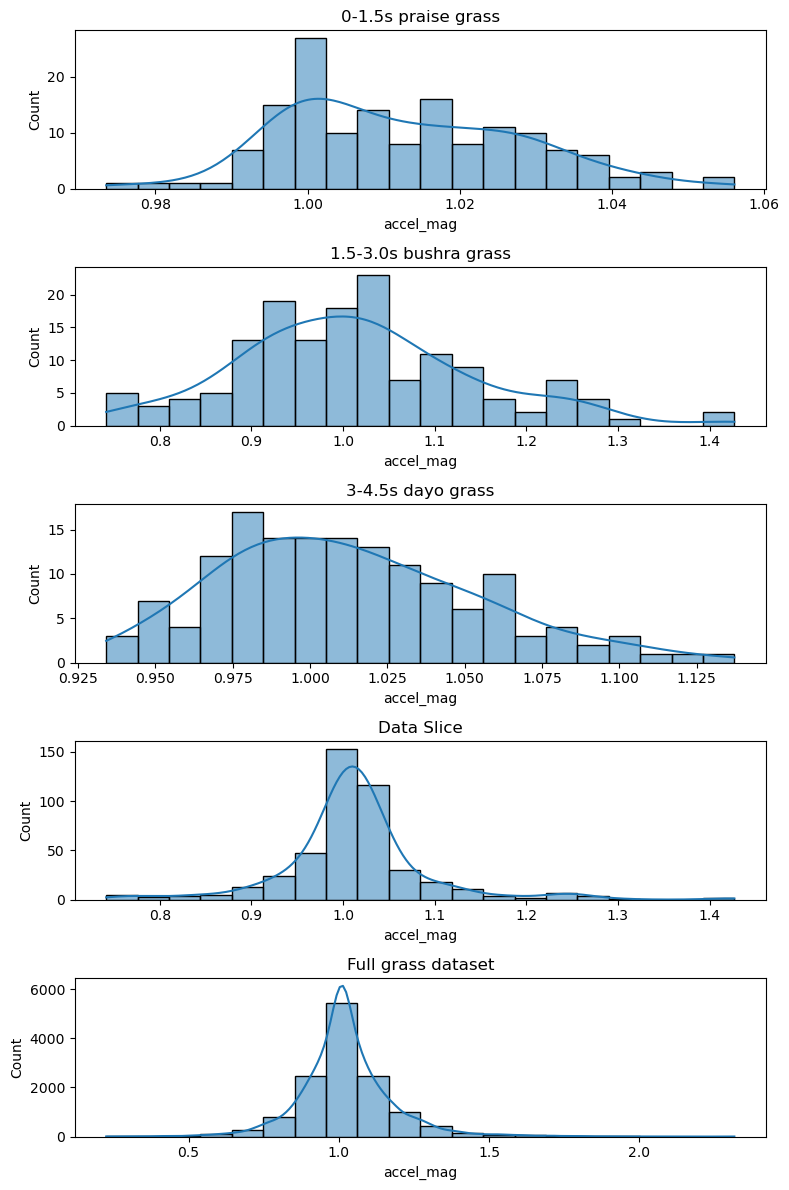

In [18]:
min_val = min([dataset['accel_mag'].min() for dataset in grass_datasets])
max_val = max([dataset['accel_mag'].max() for dataset in grass_datasets])

fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(8,12))

for i, dataset in enumerate(grass_datasets):
    ax = axis[i]
    sns.histplot(dataset['accel_mag'], kde=True, bins=20, ax=ax)
    ax.set_title(grass_titles[i])
    #ax.set_xlim(min_val, max_val)  # this is messing up the caling here for some reason

plt.tight_layout()
plt.show()

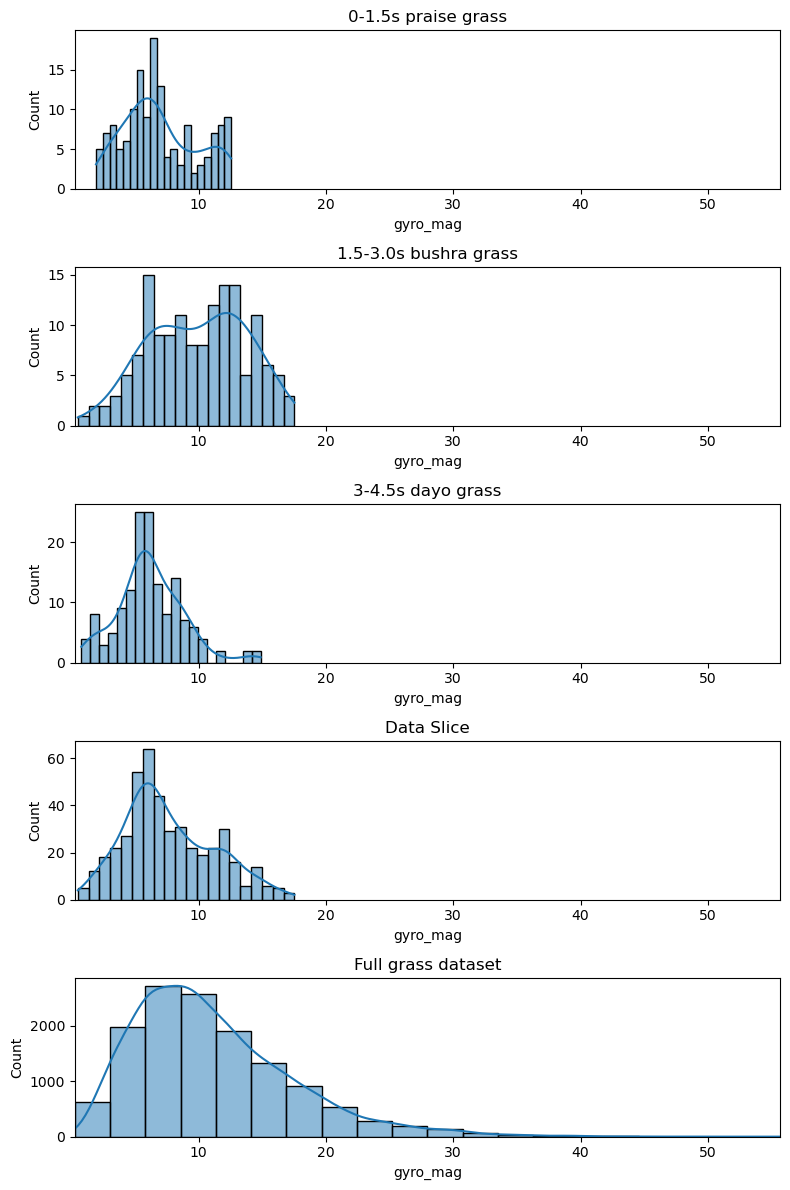

In [19]:
min_val = min([dataset['gyro_mag'].min() for dataset in grass_datasets])
max_val = max([dataset['gyro_mag'].max() for dataset in grass_datasets])

fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(8,12))

for i, dataset in enumerate(grass_datasets):
    ax = axis[i]
    sns.histplot(dataset['gyro_mag'], kde=True, bins=20, ax=ax)
    ax.set_title(grass_titles[i])
    ax.set_xlim(min_val, max_val)

plt.tight_layout()
plt.show()

### Stones

In [20]:
#Bushra Stones has 5913 rows no. 14
#Dayo Stones has 4701 rows no. 16
#Praise Stones has 5612 rows no. 12
#Concatenation order 12, 14, 16

stones_window1 = mag_stones[:150]  # sample first 1.5s from praise data
stones_window2 = mag_stones[5763:5913]  # sample next 1.5s from dayo data at 1.5s in
stones_window3 = mag_stones[10614:10764]  # sample next 1.5s from bushra data at 3.0s in

stones_data_slice = pd.concat([stones_window1, stones_window2, stones_window3], axis = 0)

stones_datasets = [stones_window1, stones_window2, stones_window3, stones_data_slice, mag_stones]
stones_titles = ["0-1.5s praise stones", "1.5-3.0s bushra stones", "3-4.5s dayo stones", "Data Slice", "Full stones dataset"]

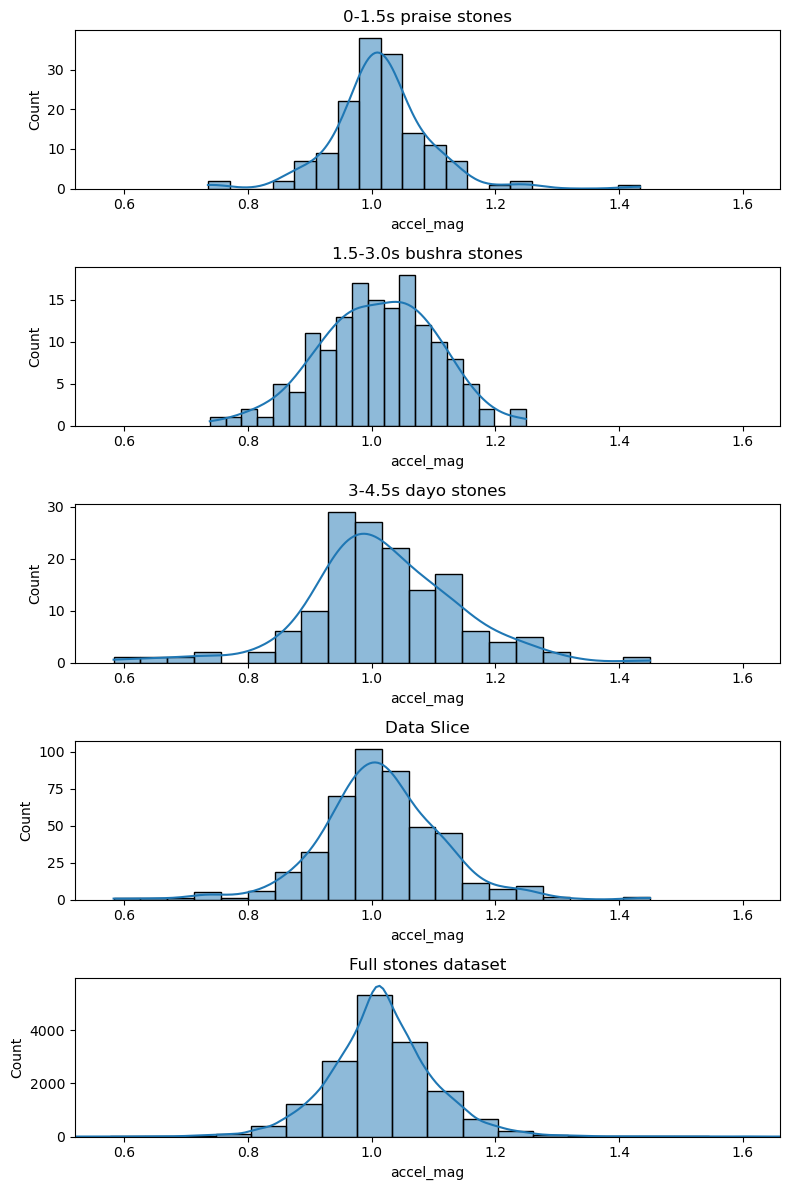

In [21]:
min_val = min([dataset['accel_mag'].min() for dataset in stones_datasets])
max_val = max([dataset['accel_mag'].max() for dataset in stones_datasets])

fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(8,12))

for i, dataset in enumerate(stones_datasets):
    ax = axis[i]
    sns.histplot(dataset['accel_mag'], kde=True, bins=20, ax=ax)
    ax.set_title(stones_titles[i])
    ax.set_xlim(min_val, max_val)  

plt.tight_layout()
plt.show()

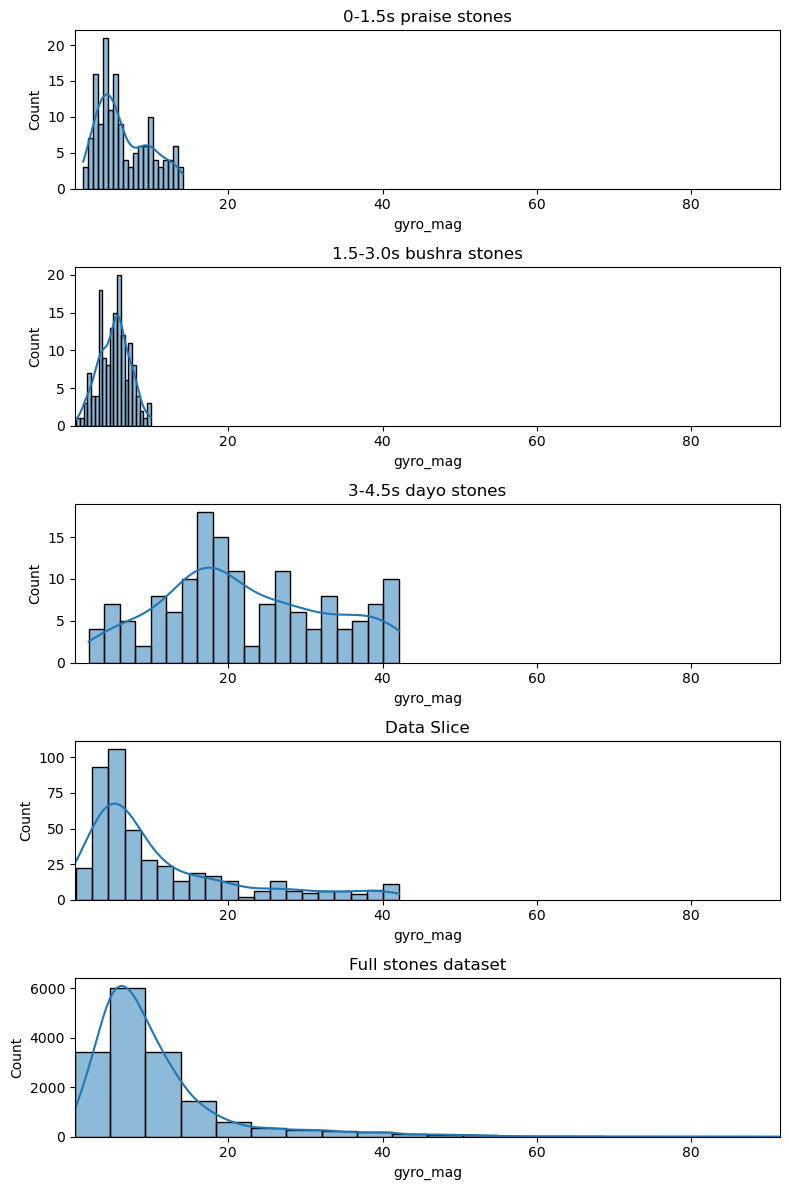

In [22]:
min_val = min([dataset['gyro_mag'].min() for dataset in stones_datasets])
max_val = max([dataset['gyro_mag'].max() for dataset in stones_datasets])

fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(8,12))

for i, dataset in enumerate(stones_datasets):
    ax = axis[i]
    sns.histplot(dataset['gyro_mag'], kde=True, bins=20, ax=ax)
    ax.set_title(stones_titles[i])
    ax.set_xlim(min_val, max_val)

plt.tight_layout()
plt.show()

### Tiles

In [23]:
#Bushra tiles has 2672 rows no. 11
#Dayo tiles has 5201 rows no. 21
#Praise tiles has 4509 rows no. 18
#Concatenation order 11, 18, 21

tiles_window1 = mag_tiles[:150]  # sample first 1.5s from praise data
tiles_window2 = mag_tiles[2823:2973]  # sample next 1.5s from dayo data at 1.5s in
tiles_window3 = mag_tiles[7482:7632]  # sample next 1.5s from bushra data at 3.0s in

tiles_data_slice = pd.concat([tiles_window1, tiles_window2, tiles_window3], axis = 0)

tiles_datasets = [tiles_window1, tiles_window2, tiles_window3, tiles_data_slice, mag_tiles]
tiles_titles = ["0-1.5s bushra tiles", "1.5-3.0s praise tiles", "3-4.5s dayo tiles", "Data Slice", "Full tiles dataset"]

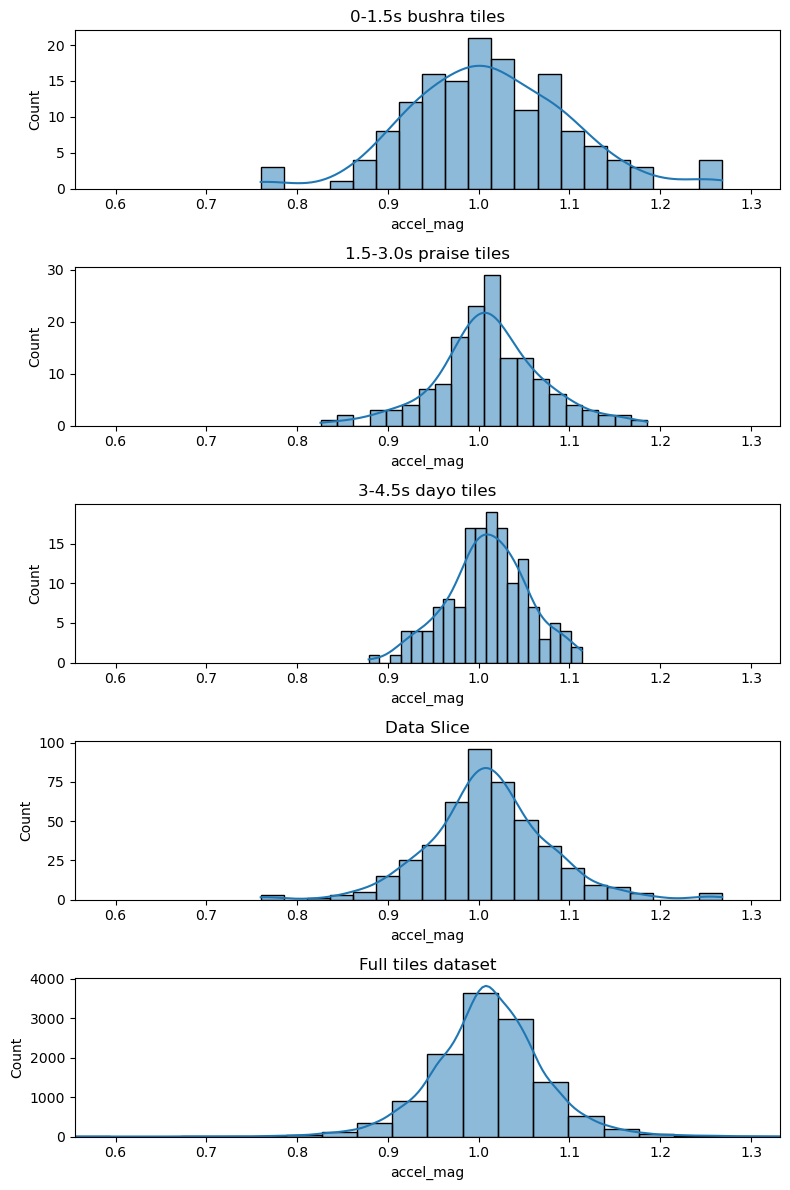

In [24]:
min_val = min([dataset['accel_mag'].min() for dataset in tiles_datasets])
max_val = max([dataset['accel_mag'].max() for dataset in tiles_datasets])

fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(8,12))

for i, dataset in enumerate(tiles_datasets):
    ax = axis[i]
    sns.histplot(dataset['accel_mag'], kde=True, bins=20, ax=ax)
    ax.set_title(tiles_titles[i])
    ax.set_xlim(min_val, max_val)  

plt.tight_layout()
plt.show()

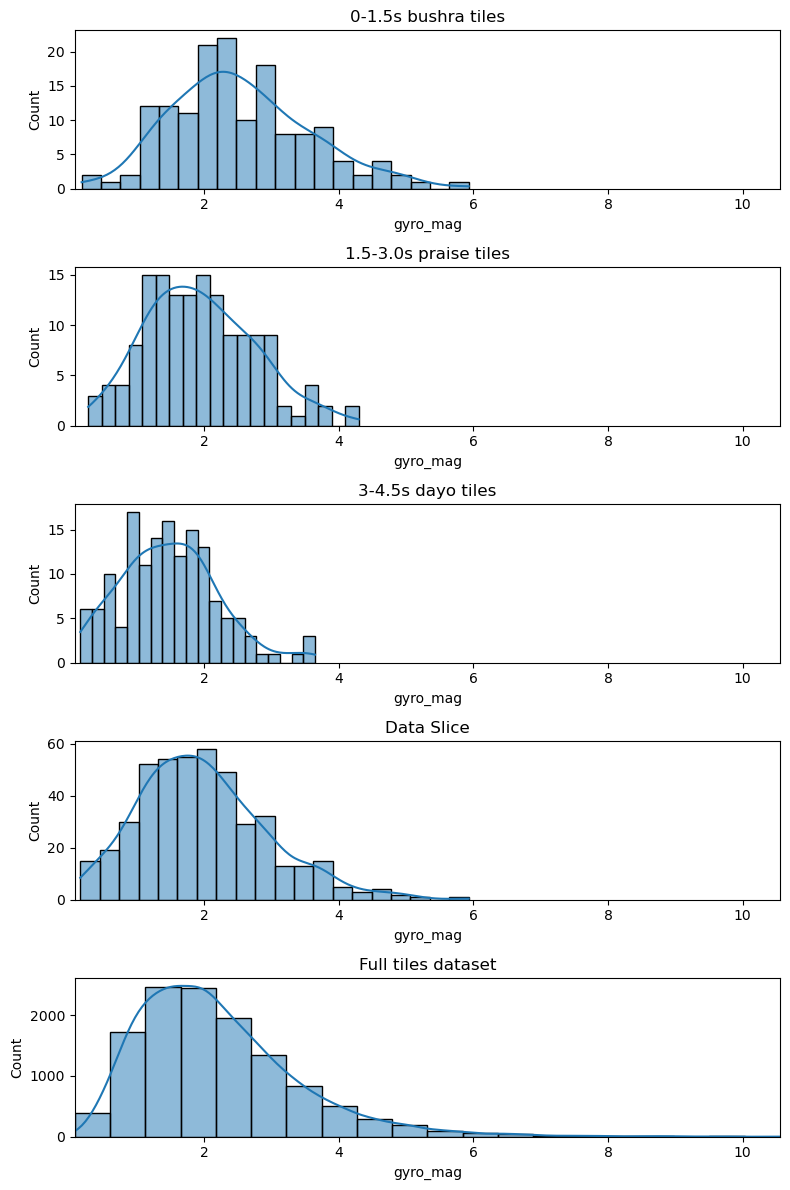

In [25]:
min_val = min([dataset['gyro_mag'].min() for dataset in tiles_datasets])
max_val = max([dataset['gyro_mag'].max() for dataset in tiles_datasets])

fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(8,12))

for i, dataset in enumerate(tiles_datasets):
    ax = axis[i]
    sns.histplot(dataset['gyro_mag'], kde=True, bins=20, ax=ax)
    ax.set_title(tiles_titles[i])
    ax.set_xlim(min_val, max_val)

plt.tight_layout()
plt.show()

# Box Plot using Magnitude

## Comparing the Windows (Acceleration Magnitude) per person

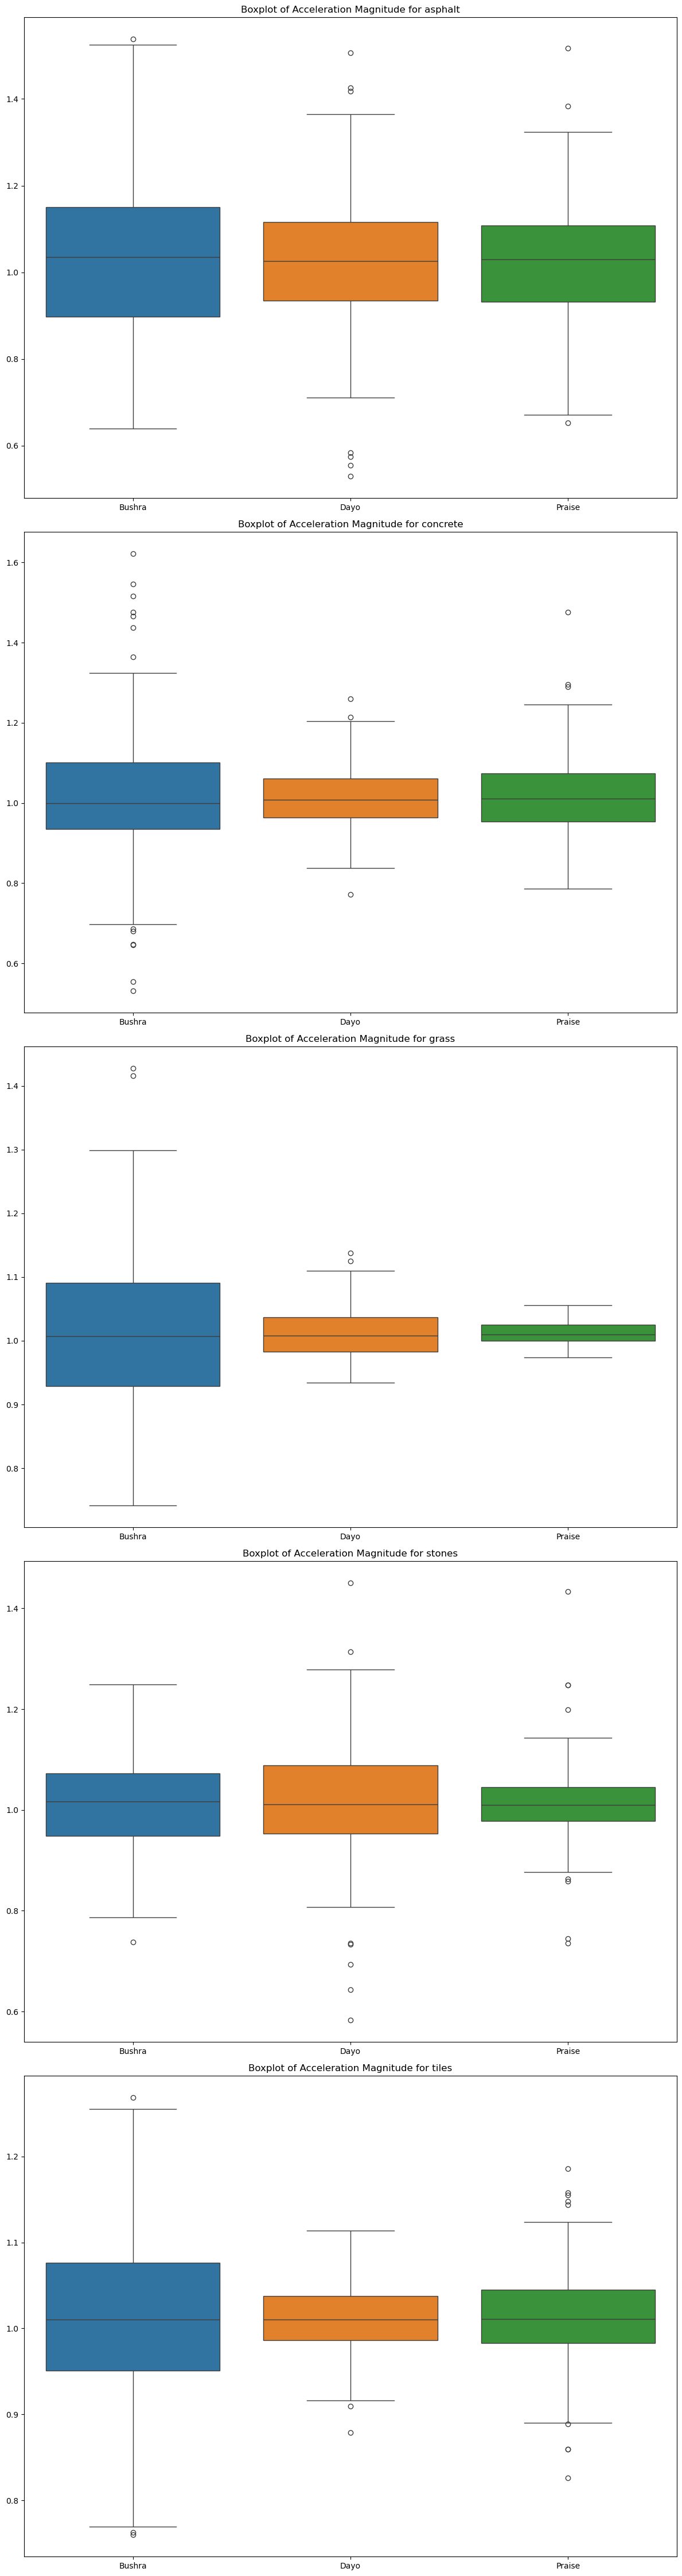

In [78]:
people = ["Bushra", "Dayo", "Praise"]

accel_mag_dfs = {
    'asphalt': pd.DataFrame({'Bushra': asphalt_window3["accel_mag"], 
                             'Dayo': asphalt_window2["accel_mag"], 
                             'Praise': asphalt_window1["accel_mag"]}),
    'concrete': pd.DataFrame({'Bushra': concrete_window2["accel_mag"], 
                              'Dayo': concrete_window1["accel_mag"], 
                              'Praise': concrete_window3["accel_mag"]}),
    'grass': pd.DataFrame({'Bushra': grass_window2["accel_mag"], 
                           'Dayo': grass_window3["accel_mag"], 
                           'Praise': grass_window1["accel_mag"]}),
    'stones': pd.DataFrame({'Bushra': stones_window2["accel_mag"], 
                            'Dayo': stones_window3["accel_mag"], 
                            'Praise': stones_window1["accel_mag"]}),
    'tiles': pd.DataFrame({'Bushra': tiles_window1["accel_mag"], 
                           'Dayo': tiles_window3["accel_mag"], 
                           'Praise': tiles_window2["accel_mag"]})
}


fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12, 45))

for i, (key, value) in enumerate(accel_mag_dfs.items()):
    sns.boxplot(data=value, ax=ax[i])
    ax[i].set_xticks(range(3))
    ax[i].set_xticklabels(people)
    ax[i].set_title(f"Boxplot of Acceleration Magnitude for {key}")

plt.tight_layout()
plt.show()

## Comparing the Windows (Gyroscope Magnitude) per person

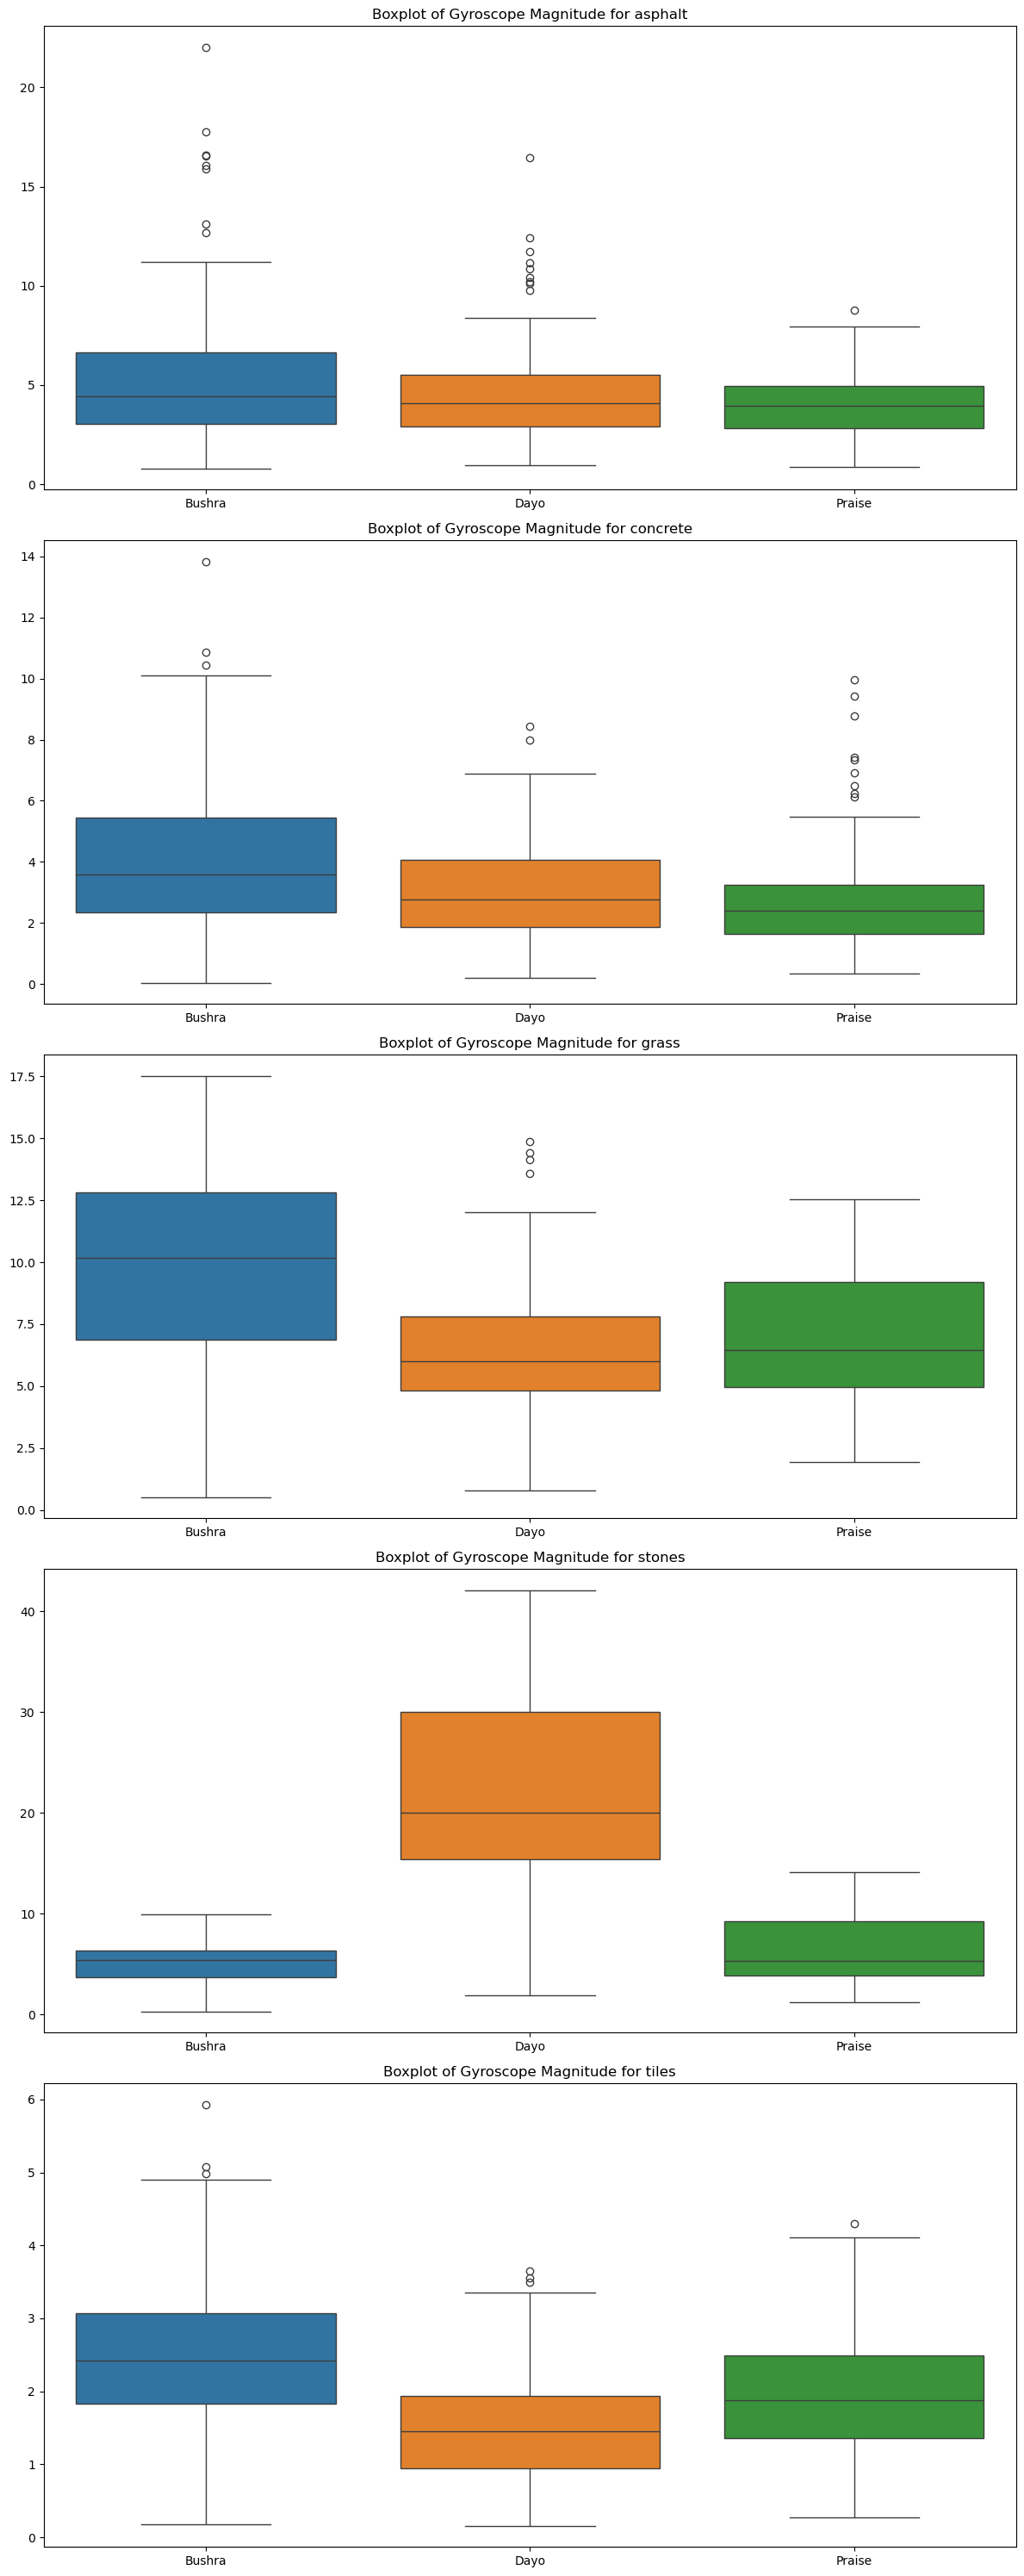

In [79]:
people = ["Bushra", "Dayo", "Praise"]

gyro_mag_dfs = {
    'asphalt': pd.DataFrame({'Bushra': asphalt_window3["gyro_mag"], 
                             'Dayo': asphalt_window2["gyro_mag"], 
                             'Praise': asphalt_window1["gyro_mag"]}),
    'concrete': pd.DataFrame({'Bushra': concrete_window2["gyro_mag"], 
                              'Dayo': concrete_window1["gyro_mag"], 
                              'Praise': concrete_window3["gyro_mag"]}),
    'grass': pd.DataFrame({'Bushra': grass_window2["gyro_mag"], 
                           'Dayo': grass_window3["gyro_mag"], 
                           'Praise': grass_window1["gyro_mag"]}),
    'stones': pd.DataFrame({'Bushra': stones_window2["gyro_mag"], 
                            'Dayo': stones_window3["gyro_mag"], 
                            'Praise': stones_window1["gyro_mag"]}),
    'tiles': pd.DataFrame({'Bushra': tiles_window1["gyro_mag"], 
                           'Dayo': tiles_window3["gyro_mag"], 
                           'Praise': tiles_window2["gyro_mag"]})
}


fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12, 30))

for i, (key, value) in enumerate(gyro_mag_dfs.items()):
    sns.boxplot(data=value, ax=ax[i])
    ax[i].set_xticks(range(3))
    ax[i].set_xticklabels(people)
    ax[i].set_title(f"Boxplot of Gyroscope Magnitude for {key}")

plt.tight_layout()
plt.show()

## Comparing the Windows (Acceleration Magnitude) per surface

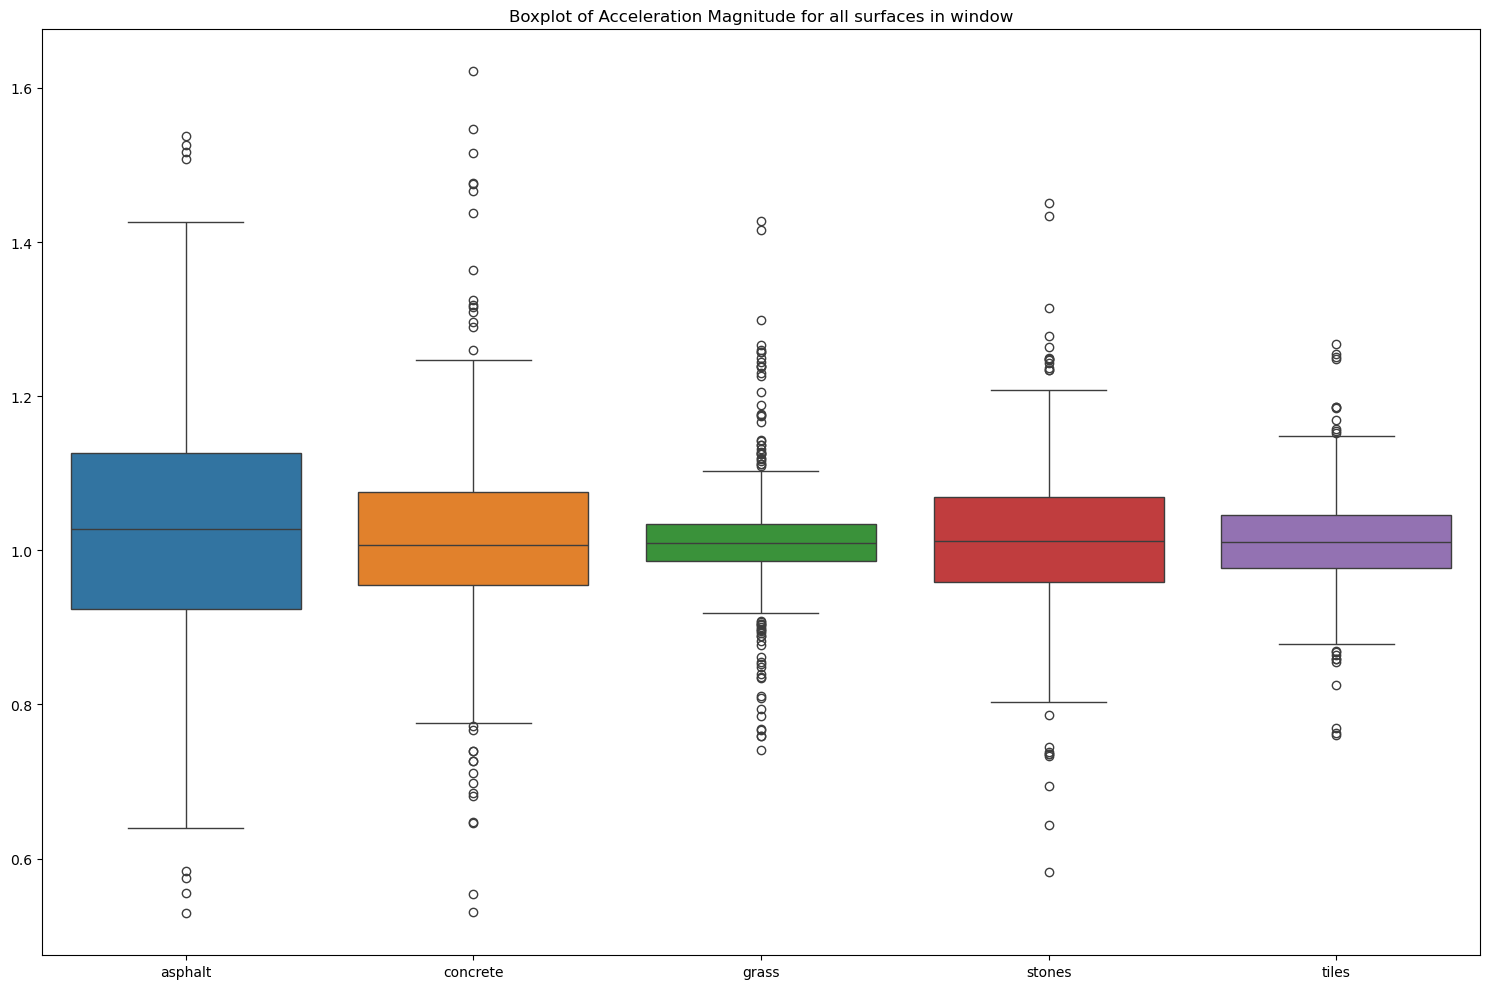

In [80]:
surfaces = ["asphalt", "concrete", "grass", "stones", "tiles"]

dfs = pd.DataFrame({'asphalt': asphalt_data_slice["accel_mag"], 
                             'concrete': concrete_data_slice["accel_mag"], 
                             'grass': grass_data_slice["accel_mag"],
                             'stones': stones_data_slice["accel_mag"],
                             'tiles': tiles_data_slice["accel_mag"]})

fig = plt.figure(figsize=(15, 10))

sns.boxplot(data=dfs)
plt.xticks(range(5), surfaces)
plt.title(f"Boxplot of Acceleration Magnitude for all surfaces in window")

plt.tight_layout()
plt.show()

## Comparing the Windows (Gyroscope Magnitude) per surface

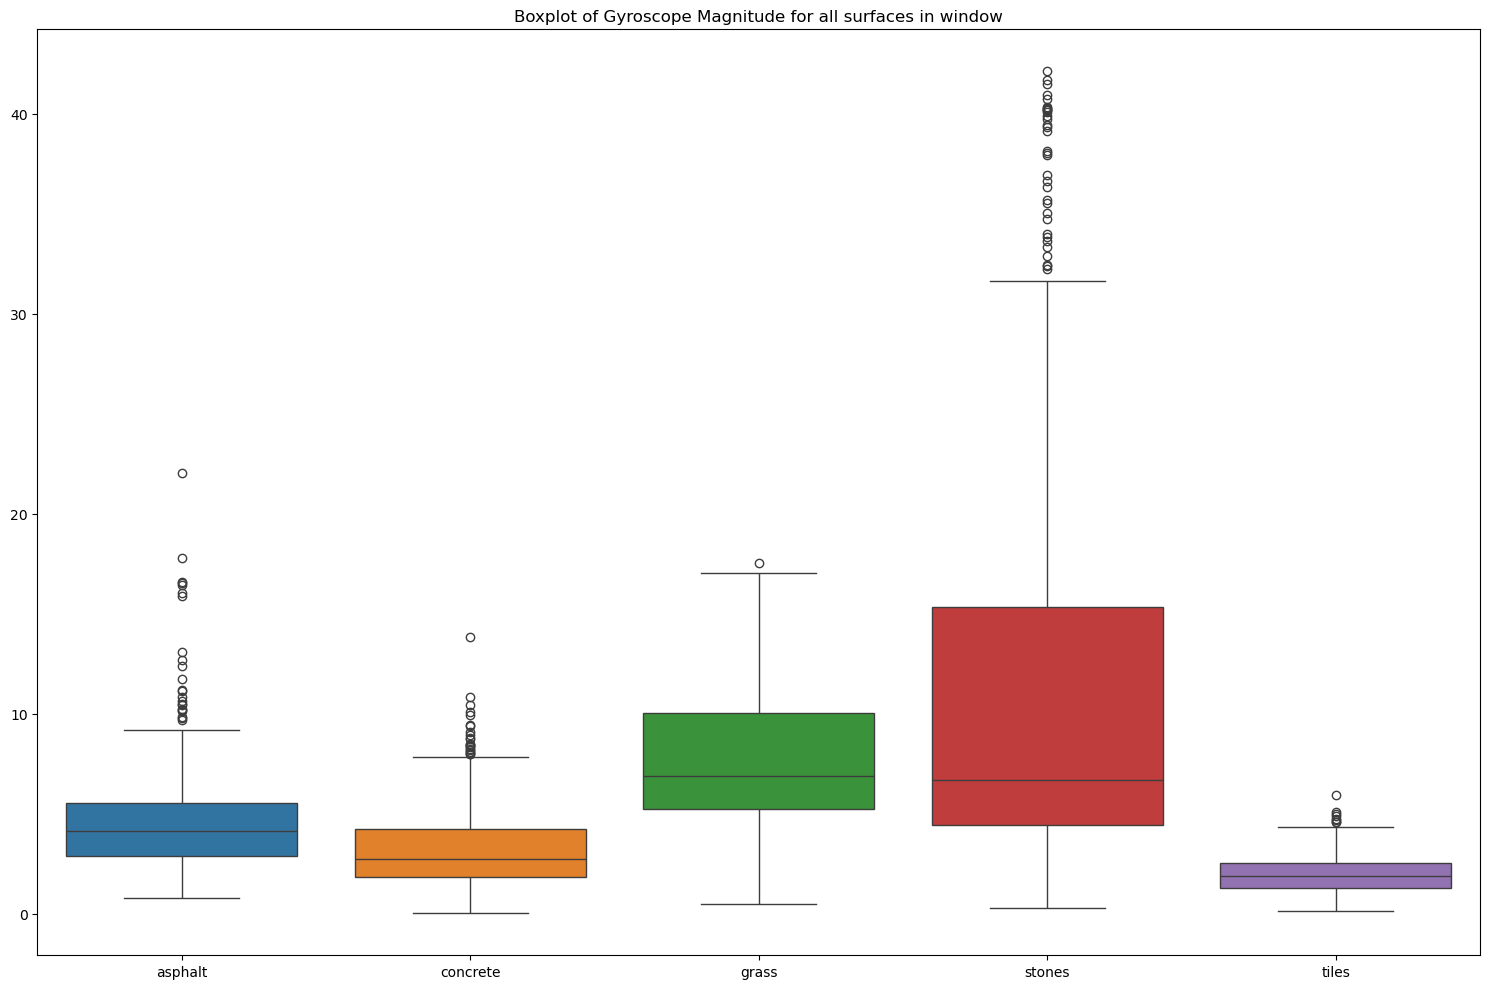

In [81]:
surfaces = ["asphalt", "concrete", "grass", "stones", "tiles"]

dfs = pd.DataFrame({'asphalt': asphalt_data_slice["gyro_mag"], 
                             'concrete': concrete_data_slice["gyro_mag"], 
                             'grass': grass_data_slice["gyro_mag"],
                             'stones': stones_data_slice["gyro_mag"],
                             'tiles': tiles_data_slice["gyro_mag"]})

fig = plt.figure(figsize=(15, 10))

sns.boxplot(data=dfs)
plt.xticks(range(5), surfaces)
plt.title(f"Boxplot of Gyroscope Magnitude for all surfaces in window")

plt.tight_layout()
plt.show()

## Comparing the full datasets (Acceleration Magnitude) per surface

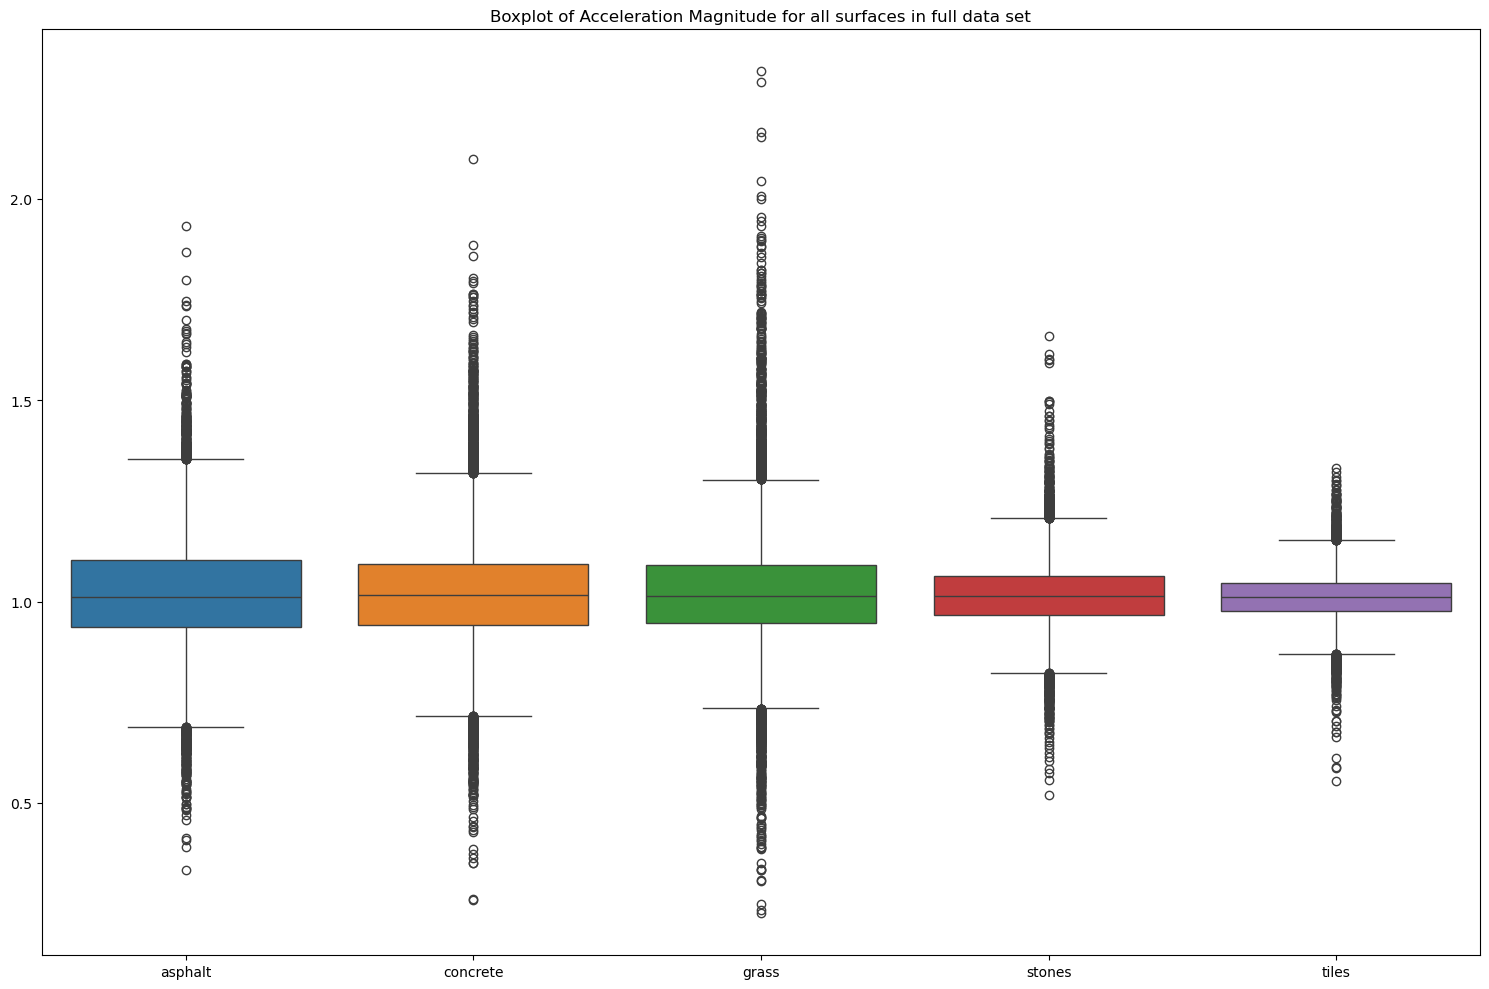

In [82]:
surfaces = ["asphalt", "concrete", "grass", "stones", "tiles"]

dfs = pd.DataFrame({'asphalt': mag_asphalt["accel_mag"], 
                             'concrete': mag_concrete["accel_mag"], 
                             'grass': mag_grass["accel_mag"],
                             'stones': mag_stones["accel_mag"],
                             'tiles': mag_tiles["accel_mag"]})

fig = plt.figure(figsize=(15, 10))

sns.boxplot(data=dfs)
plt.xticks(range(5), surfaces)
plt.title(f"Boxplot of Acceleration Magnitude for all surfaces in full data set")

plt.tight_layout()
plt.show()

## Comparing the full datasets (Gyroscope Magnitude) per surface

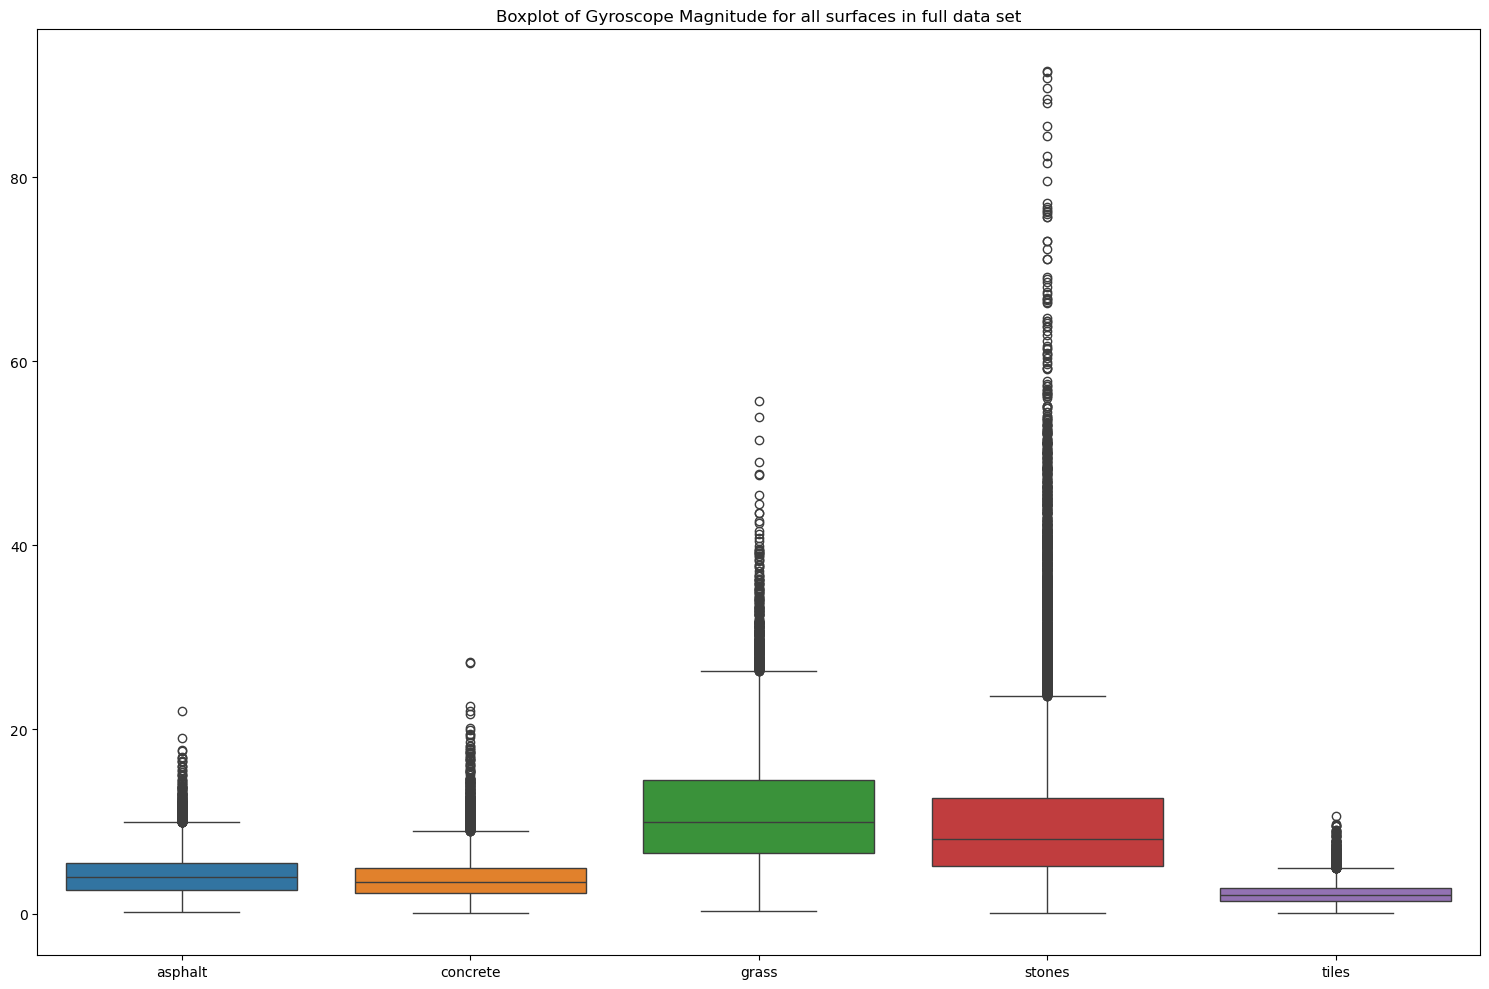

In [83]:
surfaces = ["asphalt", "concrete", "grass", "stones", "tiles"]

dfs = pd.DataFrame({'asphalt': mag_asphalt["gyro_mag"], 
                             'concrete': mag_concrete["gyro_mag"], 
                             'grass': mag_grass["gyro_mag"],
                             'stones': mag_stones["gyro_mag"],
                             'tiles': mag_tiles["gyro_mag"]})

fig = plt.figure(figsize=(15, 10))

sns.boxplot(data=dfs)
plt.xticks(range(5), surfaces)
plt.title(f"Boxplot of Gyroscope Magnitude for all surfaces in full data set")

plt.tight_layout()
plt.show()

## Ploting pairwise relationships

In [33]:
surfaces = ["asphalt", "concrete", "grass", "stones", "tiles"]

surface_windows = [asphalt_data_slice, concrete_data_slice, grass_data_slice, stones_data_slice, tiles_data_slice]

full_dfs = [mag_asphalt, mag_concrete, mag_grass, mag_stones, mag_tiles]

for i in range(5):
    surface_windows[i]['surface'] = surfaces[i]
    full_dfs[i]['surface'] = surfaces[i]

all_windows = pd.concat([asphalt_data_slice, concrete_data_slice, grass_data_slice, stones_data_slice, tiles_data_slice], ignore_index=True)
all_full_dfs = pd.concat([mag_asphalt, mag_concrete, mag_grass, mag_stones, mag_tiles], ignore_index=True)

### Windows

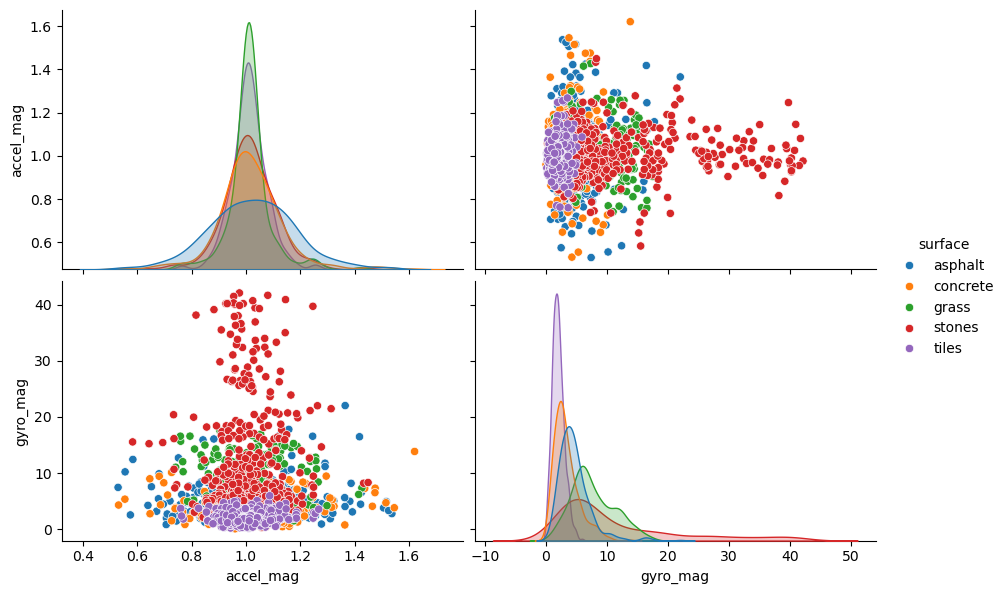

In [34]:
sns.pairplot(all_windows, hue='surface', height=3, aspect=1.5)
plt.show()

### Full dataframes

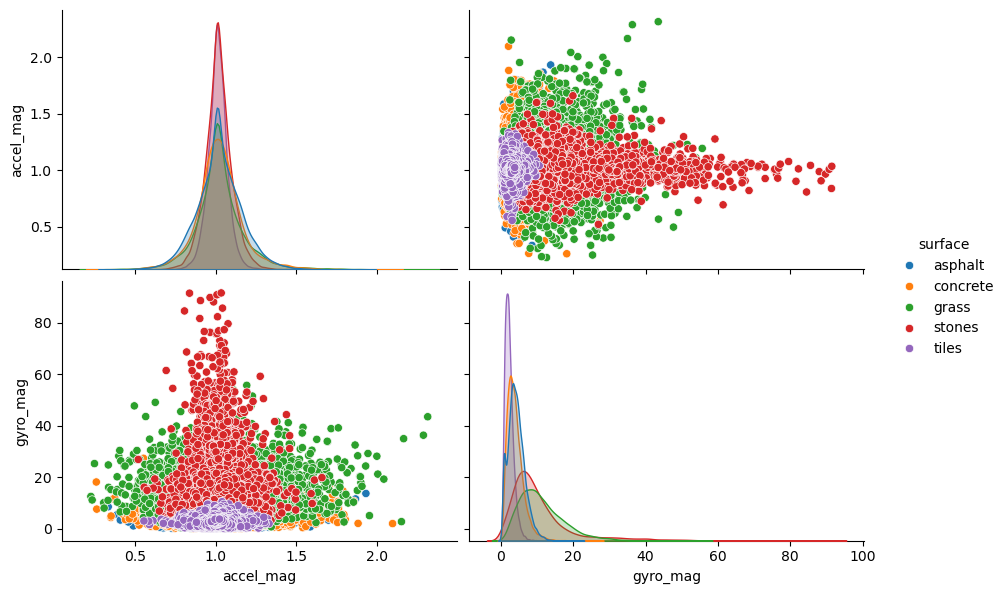

In [35]:
sns.pairplot(all_full_dfs, hue='surface', height=3, aspect=1.5)
plt.show()

# Frequency Domain Characteristics (Fast Fourier Transform (FFT), Power Spectral Density (PSD) and Peak Power)

## FFT For Windows

### Acceleration Magnitude

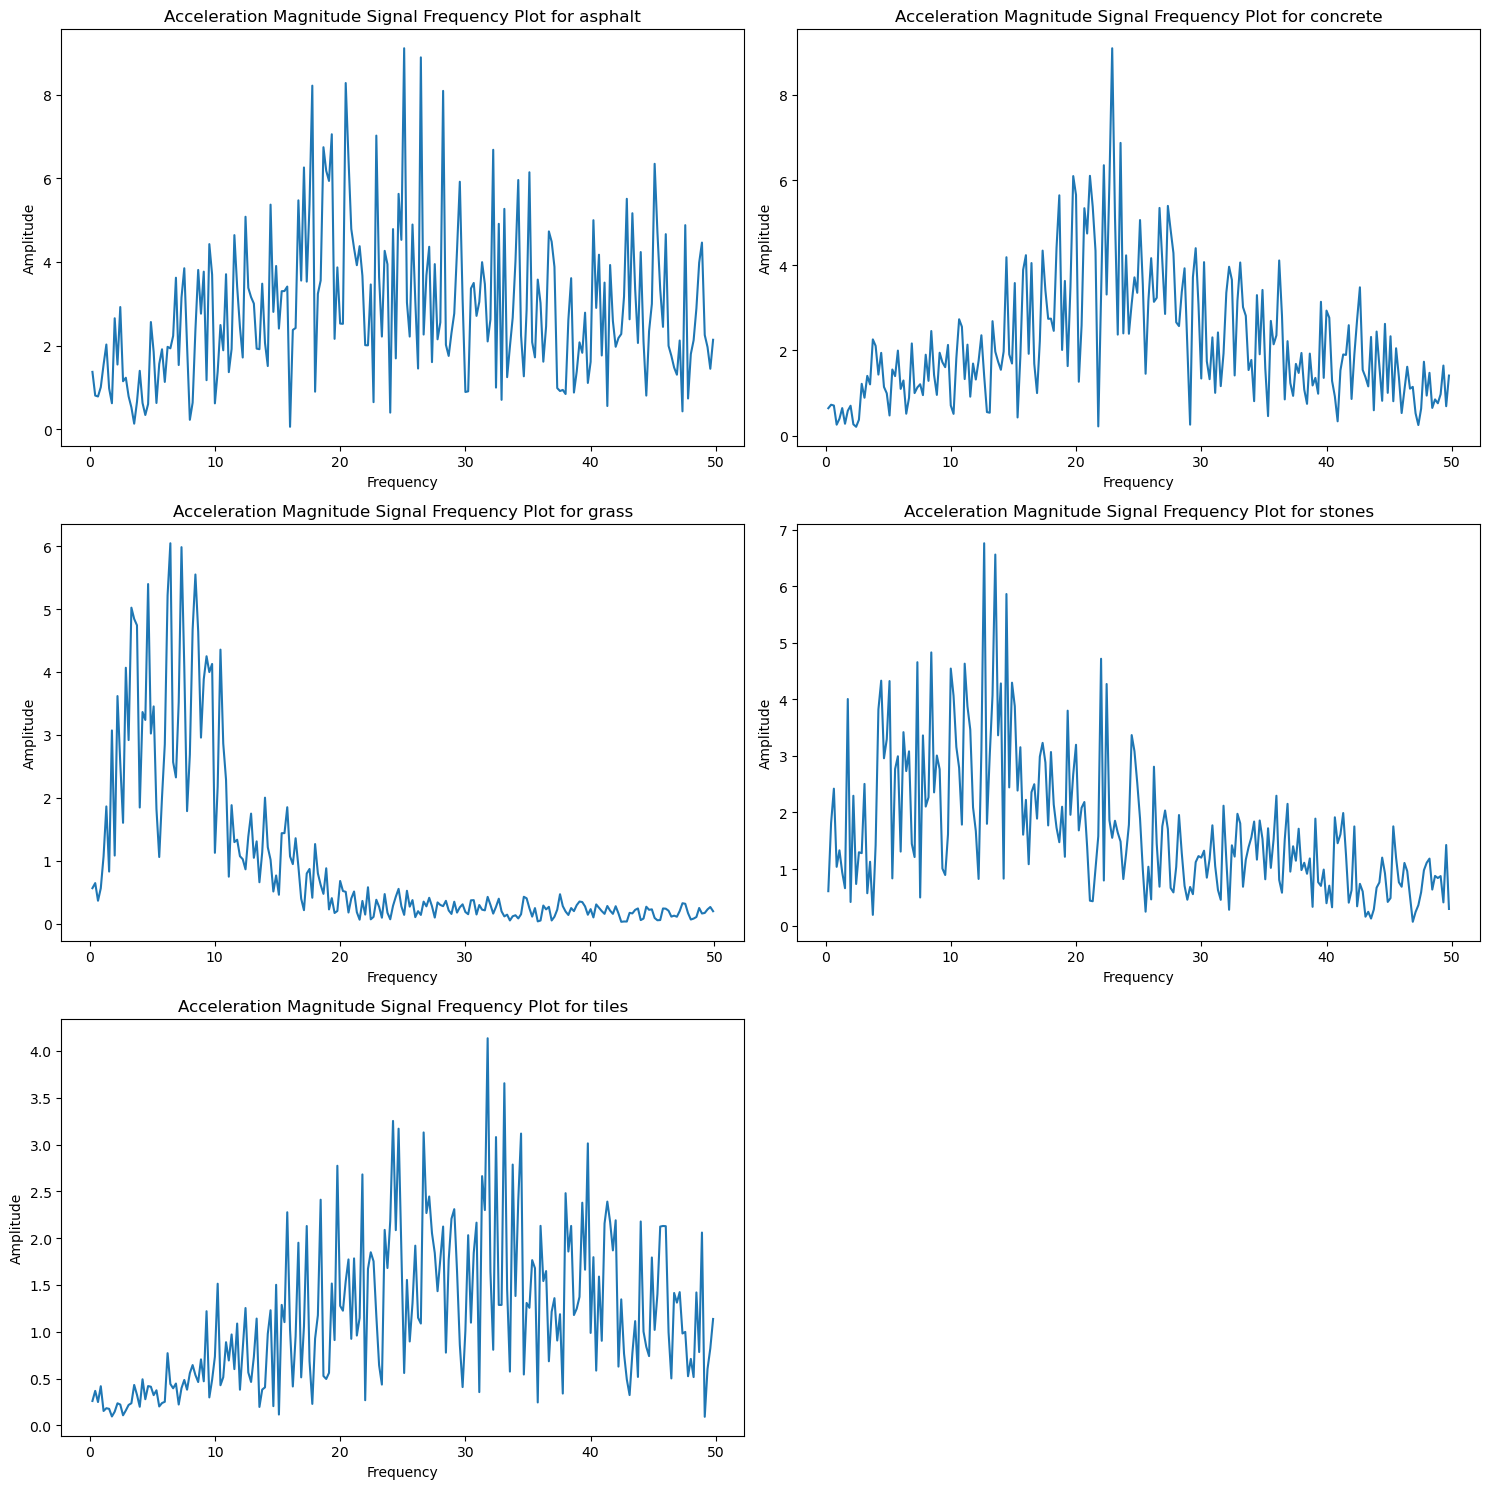

In [84]:
sampling_freq = 100
accel_window_peak_amp = {}
plt.figure(figsize=(15,15))
for i, (df, surface) in enumerate(zip(surface_windows, surfaces)):
    frequency_domain_spectrum = np.fft.fft(df["accel_mag"])  # find FFT using numpy
    frequency_axis = np.fft.fftfreq(len(df["accel_mag"]), 1/sampling_freq)  # scaling the frequency axis using sampling rate
    pos_freqs = frequency_axis > 0  # bxolean mask to select only positive frequencies
    peak_amplitude = np.abs(np.max(frequency_domain_spectrum[pos_freqs]))
    peak_frequency_index = np.argmax(frequency_domain_spectrum[pos_freqs])
    peak_frequency = frequency_axis[peak_frequency_index]
    accel_window_peak_amp[surface] = (peak_amplitude, peak_frequency)
    plt.subplot(3, 2, i + 1)
    plt.plot(frequency_axis[pos_freqs], np.abs(frequency_domain_spectrum[pos_freqs]))
    plt.title(f"Acceleration Magnitude Signal Frequency Plot for {surface}")
    plt.ylabel("Amplitude")
    plt.xlabel("Frequency")

plt.tight_layout()
plt.show()

#### Peak Amplitude (Accelerometer Magnitude) for windows

In [85]:
for surface in surfaces:
    print(f"The peak amplitude for {surface} accelerometer magnitude is {accel_window_peak_amp[surface][0]} at {accel_window_peak_amp[surface][1]} Hz")


The peak amplitude for asphalt accelerometer magnitude is 8.0942942598319 at 28.0 Hz
The peak amplitude for concrete accelerometer magnitude is 6.093035332861321 at 19.555555555555554 Hz
The peak amplitude for grass accelerometer magnitude is 5.984351379044317 at 7.126948775055679 Hz
The peak amplitude for stones accelerometer magnitude is 4.71982404946722 at 21.777777777777775 Hz
The peak amplitude for tiles accelerometer magnitude is 2.6628641861143705 at 31.11111111111111 Hz


### Gyroscope Magnitude

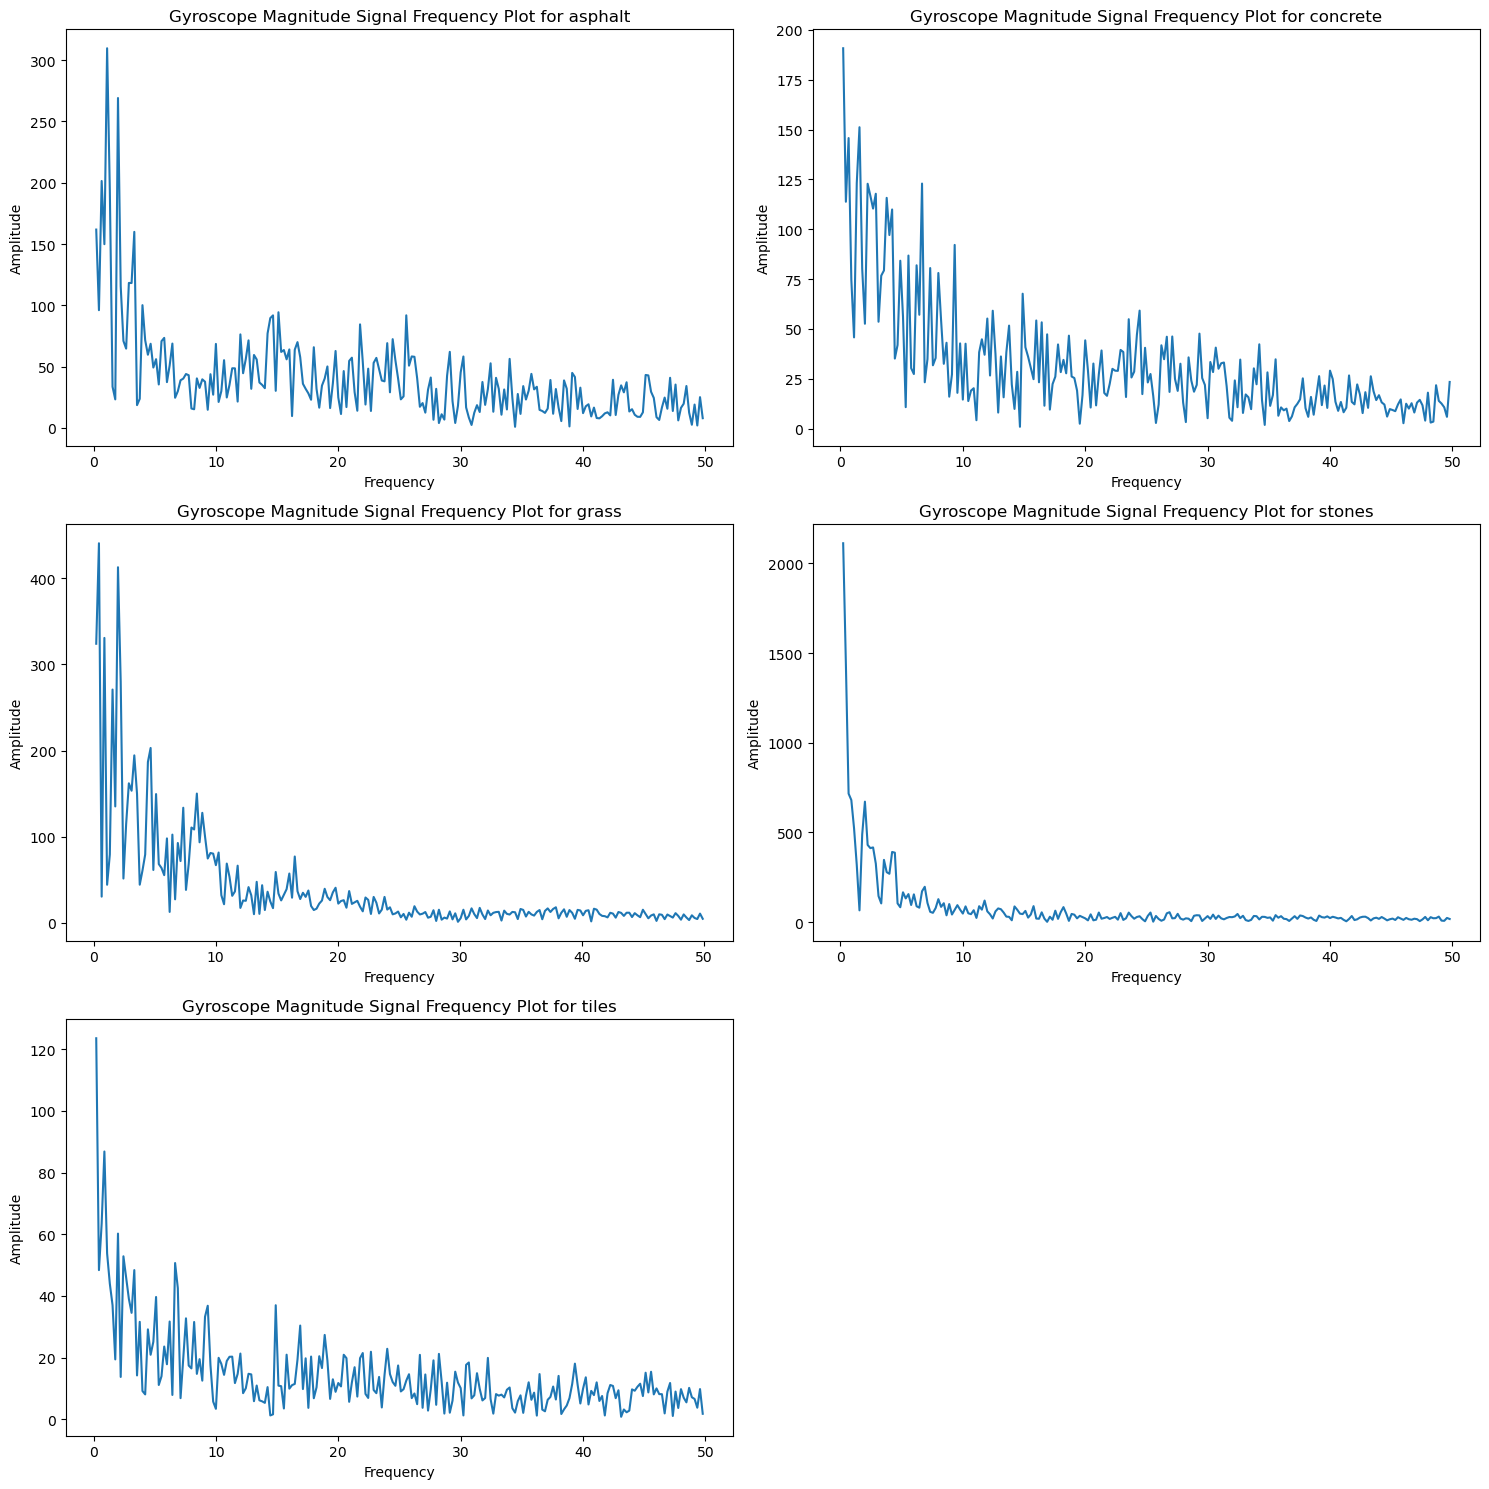

In [86]:
gyro_window_peak_amp = {}
sampling_freq = 100
plt.figure(figsize=(15,15))
for i, (df, surface) in enumerate(zip(surface_windows, surfaces)):
    frequency_domain_spectrum = np.fft.fft(df["gyro_mag"])  # find FFT using numpy
    frequency_axis = np.fft.fftfreq(len(df["gyro_mag"]), 1/sampling_freq)  # scaling the frequency axis using sampling rate
    pos_freqs = frequency_axis > 0  # bxolean mask to select only positive frequencies
    peak_amplitude = np.abs(np.max(frequency_domain_spectrum[pos_freqs]))
    peak_frequency_index = np.argmax(frequency_domain_spectrum[pos_freqs])
    peak_frequency = frequency_axis[peak_frequency_index]
    gyro_window_peak_amp[surface] = (peak_amplitude, peak_frequency)
    plt.subplot(3, 2, i + 1)
    plt.plot(frequency_axis[pos_freqs], np.abs(frequency_domain_spectrum[pos_freqs]))
    plt.title(f"Gyroscope Magnitude Signal Frequency Plot for {surface}")
    plt.ylabel("Amplitude")
    plt.xlabel("Frequency")

plt.tight_layout()
plt.show()

#### Peak Amplitude (Gyroscope Magnitude) for windows

In [87]:
for surface in surfaces:
    print(f"The peak amplitude for {surface} gyroscope magnitude is {gyro_window_peak_amp[surface][0]} at {gyro_window_peak_amp[surface][1]} Hz")

The peak amplitude for asphalt gyroscope magnitude is 149.86261357314604 at 0.6666666666666666 Hz
The peak amplitude for concrete gyroscope magnitude is 122.79617712258893 at 2.0 Hz
The peak amplitude for grass gyroscope magnitude is 440.68296123024834 at 0.22271714922048996 Hz
The peak amplitude for stones gyroscope magnitude is 680.8909071016925 at 0.6666666666666666 Hz
The peak amplitude for tiles gyroscope magnitude is 60.20459511715072 at 1.7777777777777777 Hz


## FFT for Full Data Sets

### Acceleration Magnitude

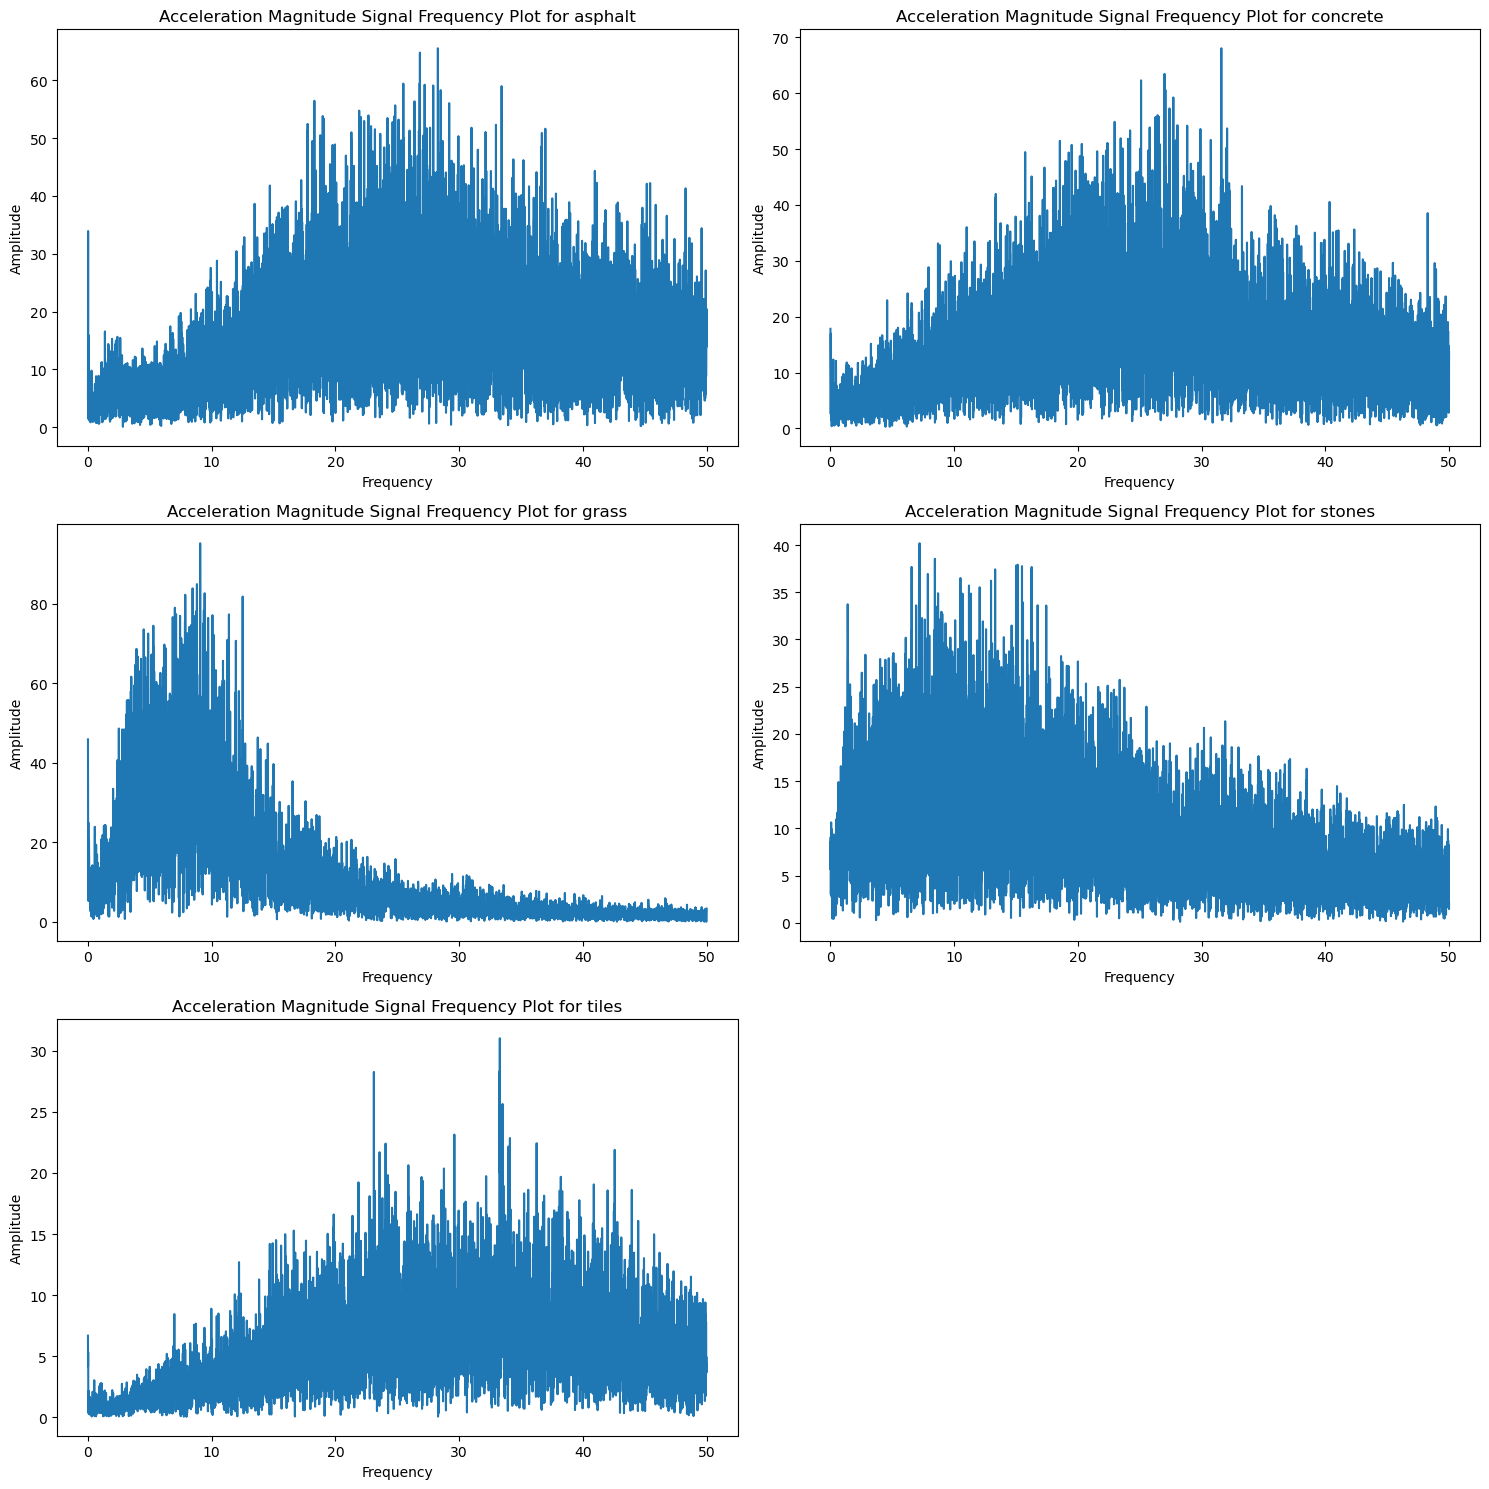

In [89]:
sampling_freq = 100
accel_full_peak_amp = {}
plt.figure(figsize=(15,15))
for i, (df, surface) in enumerate(zip(full_dfs, surfaces)):
    frequency_domain_spectrum = np.fft.fft(df["accel_mag"])  # find FFT using numpy
    frequency_axis = np.fft.fftfreq(len(df["accel_mag"]), 1/sampling_freq)  # scaling the frequency axis using sampling rate
    pos_freqs = frequency_axis > 0  # bxolean mask to select only positive frequencies
    peak_amplitude = np.abs(np.max(frequency_domain_spectrum[pos_freqs]))
    peak_frequency_index = np.argmax(frequency_domain_spectrum[pos_freqs])
    peak_frequency = frequency_axis[peak_frequency_index]
    accel_full_peak_amp[surface] = (peak_amplitude, peak_frequency)
    plt.subplot(3, 2, i + 1)
    plt.plot(frequency_axis[pos_freqs], np.abs(frequency_domain_spectrum[pos_freqs]))
    plt.title(f"Acceleration Magnitude Signal Frequency Plot for {surface}")
    plt.ylabel("Amplitude")
    plt.xlabel("Frequency")

plt.tight_layout()
plt.show()

#### Peak Amplitude (Accelerometer Magnitude) for full dataset

In [90]:
for surface in surfaces:
    print(f"The peak amplitude for {surface} accelerometer magnitude is {accel_full_peak_amp[surface][0]} at {accel_full_peak_amp[surface][1]} Hz")


The peak amplitude for asphalt accelerometer magnitude is 65.5606369611027 at 28.27556000500563 Hz
The peak amplitude for concrete accelerometer magnitude is 57.2860164974608 at 27.39494662883394 Hz
The peak amplitude for grass accelerometer magnitude is 82.62402927104556 at 9.428164580679008 Hz
The peak amplitude for stones accelerometer magnitude is 37.92045648437898 at 15.125739644970412 Hz
The peak amplitude for tiles accelerometer magnitude is 21.69718422302471 at 23.562197092084006 Hz


### Gyroscope Magnitude

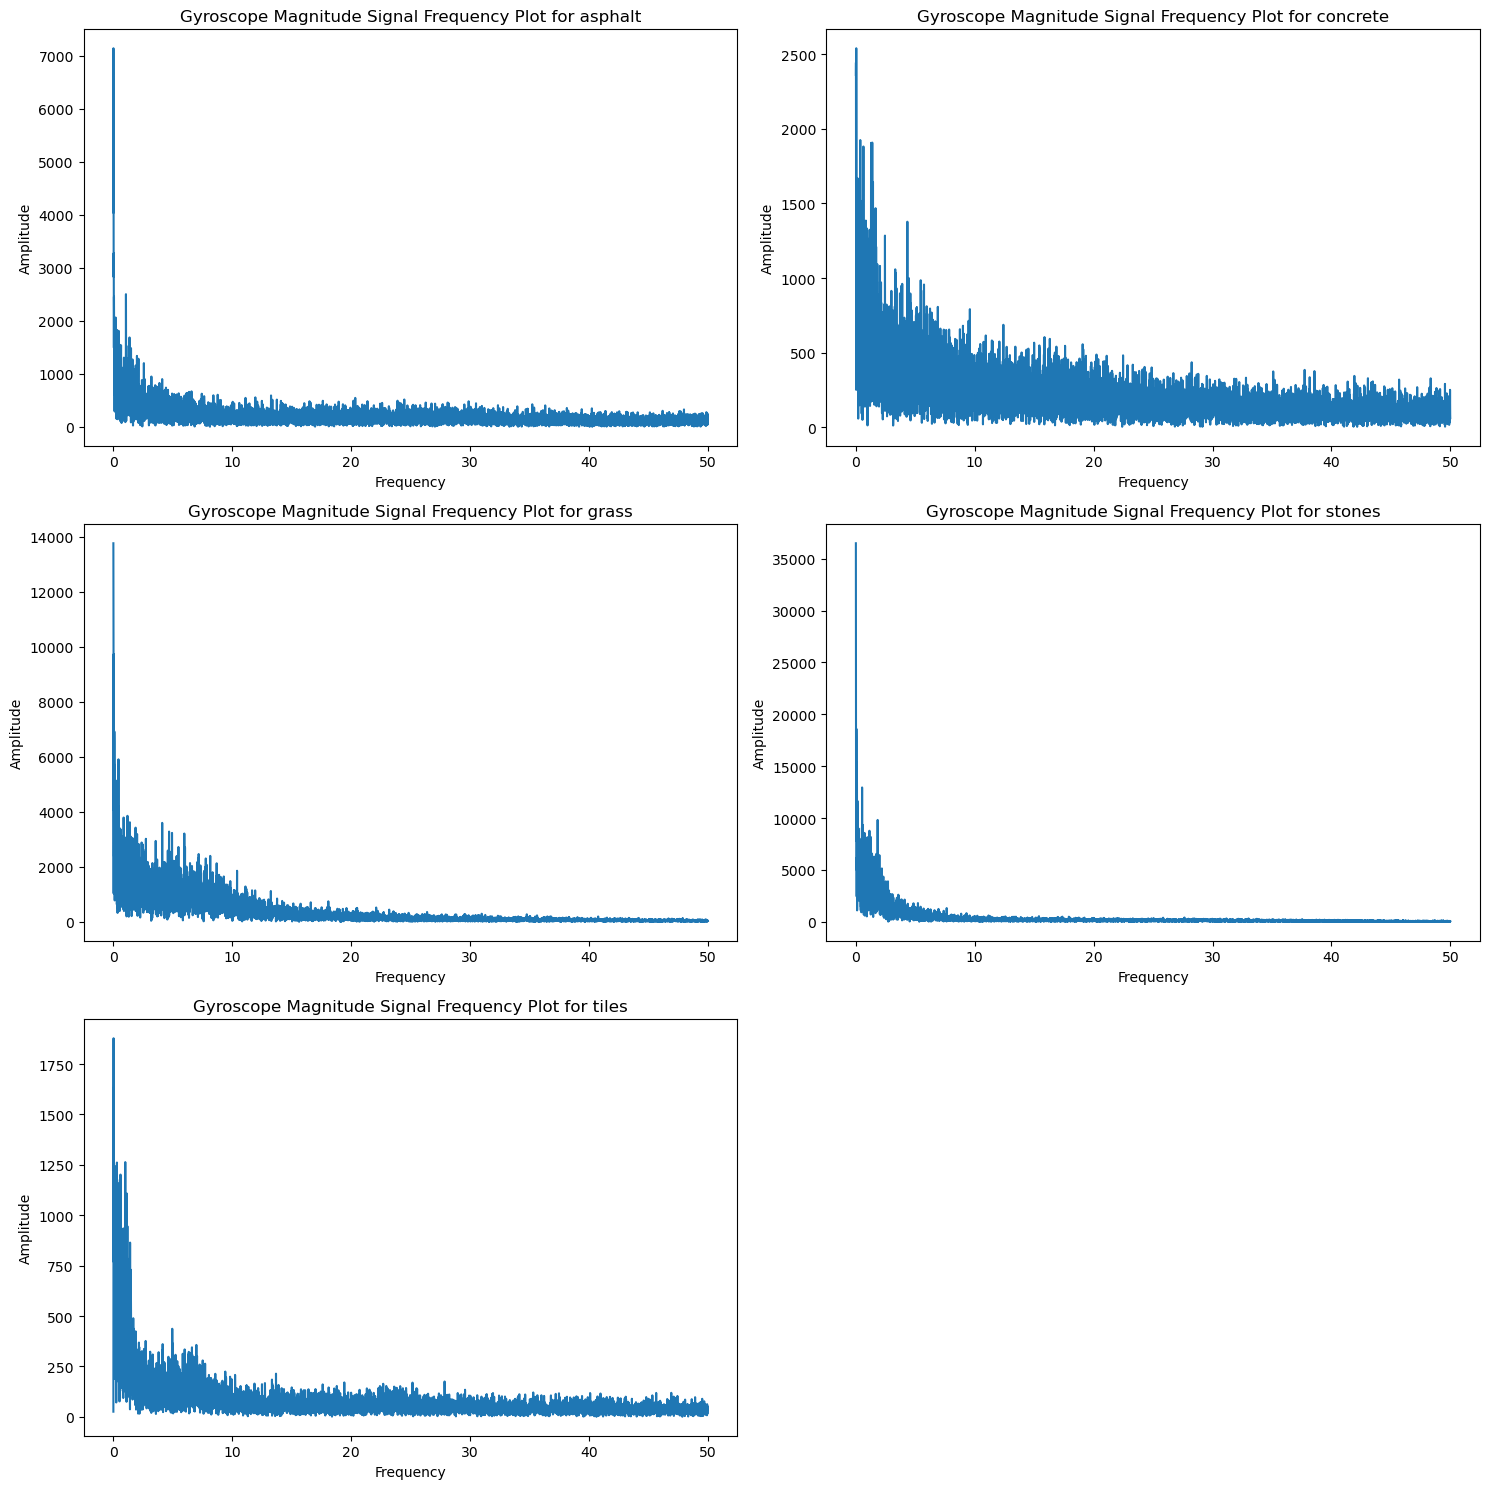

In [91]:
gyro_full_peak_amp = {}
sampling_freq = 100
plt.figure(figsize=(15,15))
for i, (df, surface) in enumerate(zip(full_dfs, surfaces)):
    frequency_domain_spectrum = np.fft.fft(df["gyro_mag"])  # find FFT using numpy
    frequency_axis = np.fft.fftfreq(len(df["gyro_mag"]), 1/sampling_freq)  # scaling the frequency axis using sampling rate
    pos_freqs = frequency_axis > 0  # bxolean mask to select only positive frequencies
    peak_amplitude = np.abs(np.max(frequency_domain_spectrum[pos_freqs]))
    peak_frequency_index = np.argmax(frequency_domain_spectrum[pos_freqs])
    peak_frequency = frequency_axis[peak_frequency_index]
    gyro_full_peak_amp[surface] = (peak_amplitude, peak_frequency)
    plt.subplot(3, 2, i + 1)
    plt.plot(frequency_axis[pos_freqs], np.abs(frequency_domain_spectrum[pos_freqs]))
    plt.title(f"Gyroscope Magnitude Signal Frequency Plot for {surface}")
    plt.ylabel("Amplitude")
    plt.xlabel("Frequency")

plt.tight_layout()
plt.show()

#### Peak Amplitude (Gyroscope Magnitude) for full data sets

In [92]:
for surface in surfaces:
    print(f"The peak amplitude for {surface} gyroscope magnitude is {gyro_full_peak_amp[surface][0]} at {gyro_full_peak_amp[surface][1]} Hz")


The peak amplitude for asphalt gyroscope magnitude is 2502.964820727566 at 1.0574396195720186 Hz
The peak amplitude for concrete gyroscope magnitude is 2444.3320440595 at 0.00675584380489123 Hz
The peak amplitude for grass gyroscope magnitude is 5056.2539757807945 at 0.20235329386195008 Hz
The peak amplitude for stones gyroscope magnitude is 11815.861974781234 at 0.08012820512820512 Hz
The peak amplitude for tiles gyroscope magnitude is 1177.4775836557221 at 0.5492730210016155 Hz


## Power Spectral Density for Windows

### Acceleration Magnitude

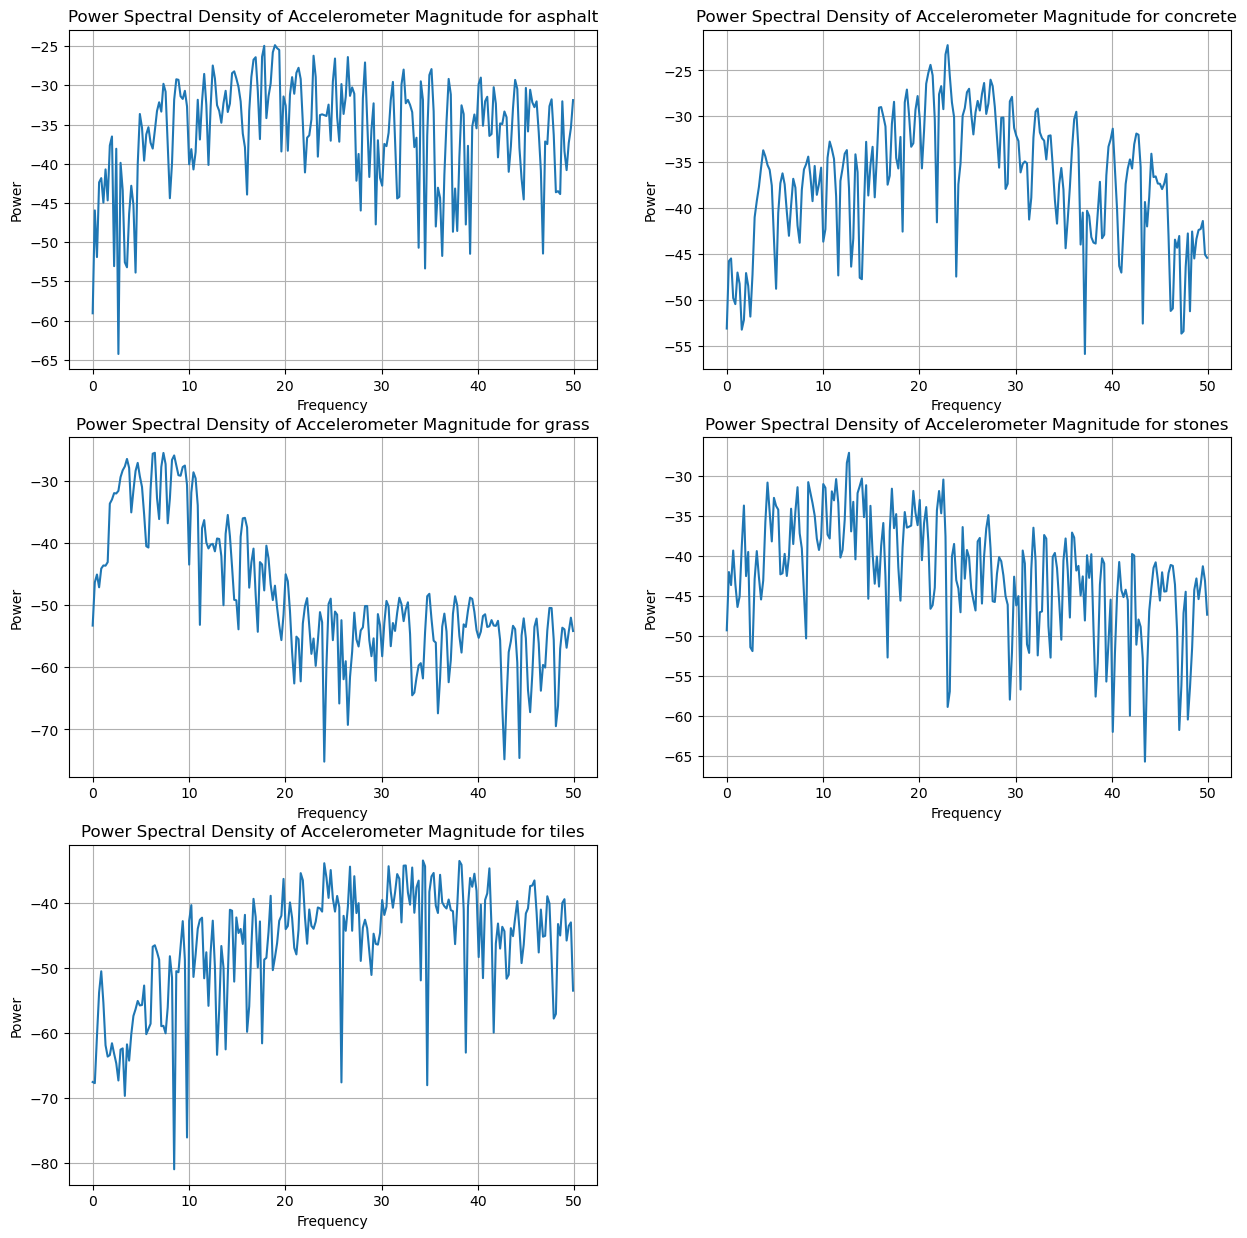

In [70]:
plt.figure(figsize=(15, 15))
accel_window_peak_power = {}

for i, (df, surface) in enumerate(zip(surface_windows, surfaces)):
    signal = df["accel_mag"]
    sampling_freq = 100
    frequencies, psd = welch(signal, sampling_freq, nperseg = 449)  # using welch's method calculate PSD with SciPy welch function
    psd_dB = 10 * np.log10(psd)  # convert PSD values to decibels scale
    peak_power = round(np.max(psd_dB), 2)  # find highest value of the PSD in decibels and round to 2 decimal places
    peak_power_freq = round(frequencies[np.argmax(psd_dB)])  # find the corresponding frequency ar peak power and also round it
    accel_window_peak_power[surface] = (peak_power, peak_power_freq)
    plt.subplot(3, 2, i + 1)
    plt.grid(True)
    plt.plot(frequencies, psd_dB)
    plt.title(f"Power Spectral Density of Accelerometer Magnitude for {surface}")
    plt.ylabel("Power")
    plt.xlabel("Frequency")
plt.show()

#### Peak Power (Acceleration Magnitude) For windows

In [71]:
for surface in surfaces:
    print(f"The peak power for {surface} accelerometer magnitude is {accel_window_peak_power[surface][0]} at {accel_window_peak_power[surface][1]} Hz")

The peak power for asphalt accelerometer magnitude is -24.88 at 19 Hz
The peak power for concrete accelerometer magnitude is -22.24 at 23 Hz
The peak power for grass accelerometer magnitude is -25.46 at 6 Hz
The peak power for stones accelerometer magnitude is -27.07 at 13 Hz
The peak power for tiles accelerometer magnitude is -33.44 at 34 Hz


### Gyroscope Magnitude

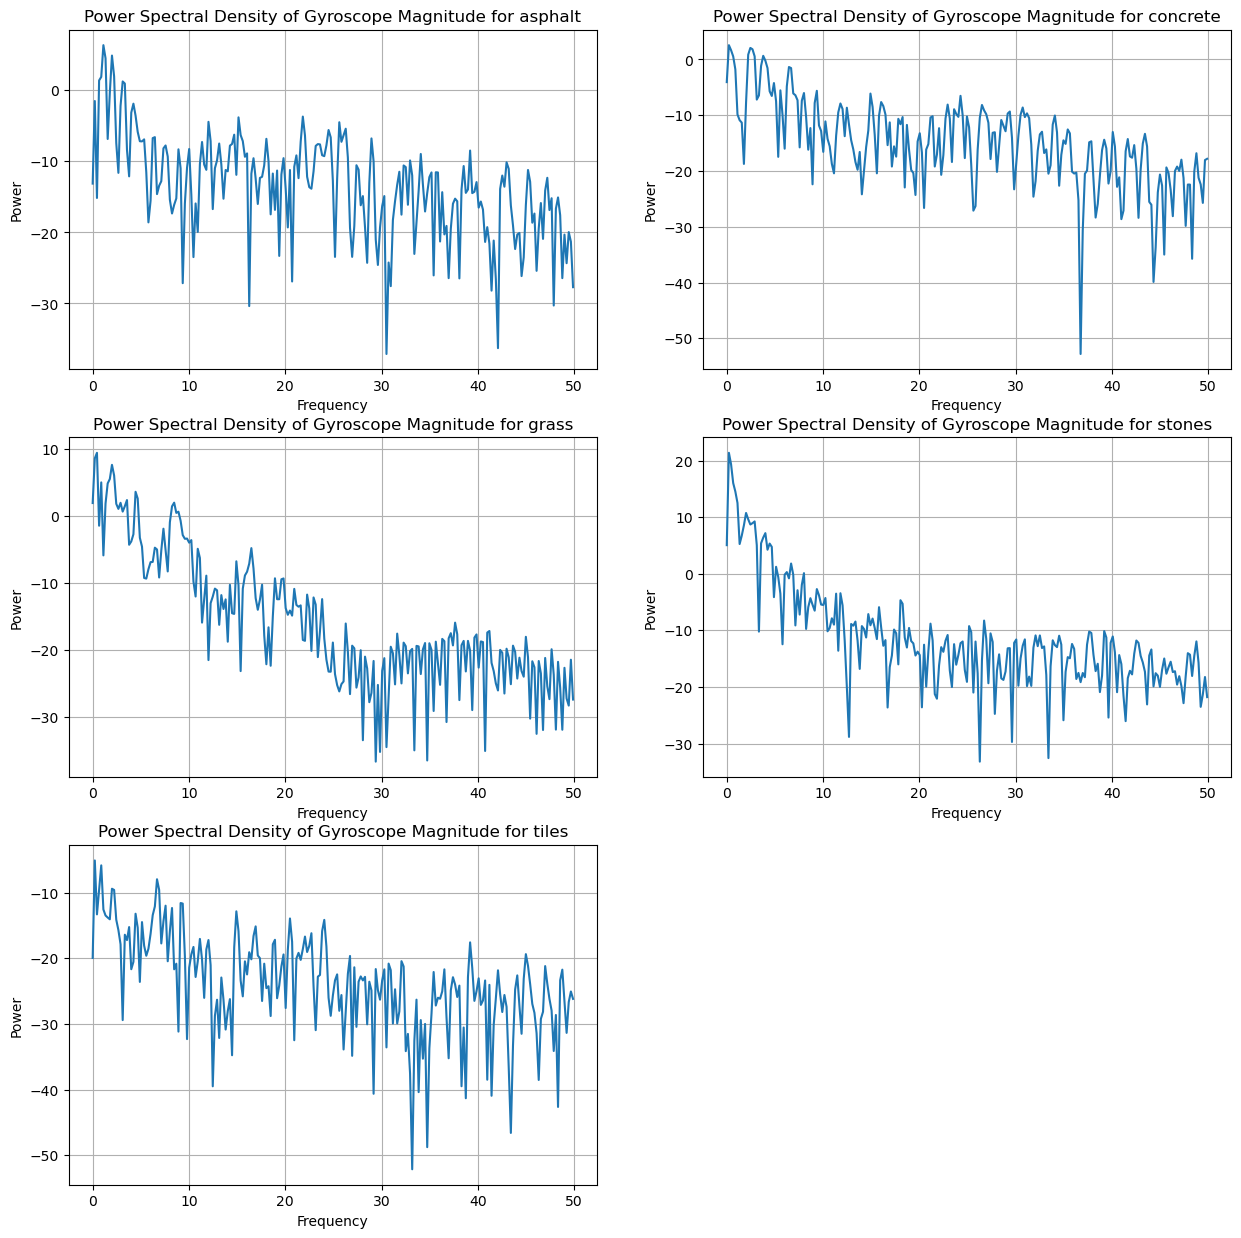

In [72]:
plt.figure(figsize=(15, 15))
gyro_window_peak_power = {}

for i, (df, surface) in enumerate(zip(surface_windows, surfaces)):
    signal = df["gyro_mag"]
    sampling_freq = 100
    frequencies, psd = welch(signal, sampling_freq, nperseg = 449)  # using welch's method calculate PSD with SciPy welch function
    psd_dB = 10 * np.log10(psd)  # convert PSD values to decibels scale
    peak_power = round(np.max(psd_dB), 2)  # find highest value of the PSD in decibels and round to 2 decimal places
    peak_power_freq = round(frequencies[np.argmax(psd_dB)])  # find the corresponding frequency ar peak power and also round it
    gyro_window_peak_power[surface] = (peak_power, peak_power_freq)
    plt.subplot(3, 2, i + 1)
    plt.grid(True)
    plt.plot(frequencies, psd_dB)
    plt.title(f"Power Spectral Density of Gyroscope Magnitude for {surface}")
    plt.ylabel("Power")
    plt.xlabel("Frequency")
plt.show()

#### Peak Power (Gyroscope Magnitude) For windows

In [73]:
for surface in surfaces:
    print(f"The peak power for {surface} gyroscope magnitude is {gyro_window_peak_power[surface][0]} at {gyro_window_peak_power[surface][1]} Hz")

The peak power for asphalt gyroscope magnitude is 6.37 at 1 Hz
The peak power for concrete gyroscope magnitude is 2.57 at 0 Hz
The peak power for grass gyroscope magnitude is 9.42 at 0 Hz
The peak power for stones gyroscope magnitude is 21.37 at 0 Hz
The peak power for tiles gyroscope magnitude is -5.08 at 0 Hz


## Power Spectral Density for Full Data Set

### Acceleration Magnitude

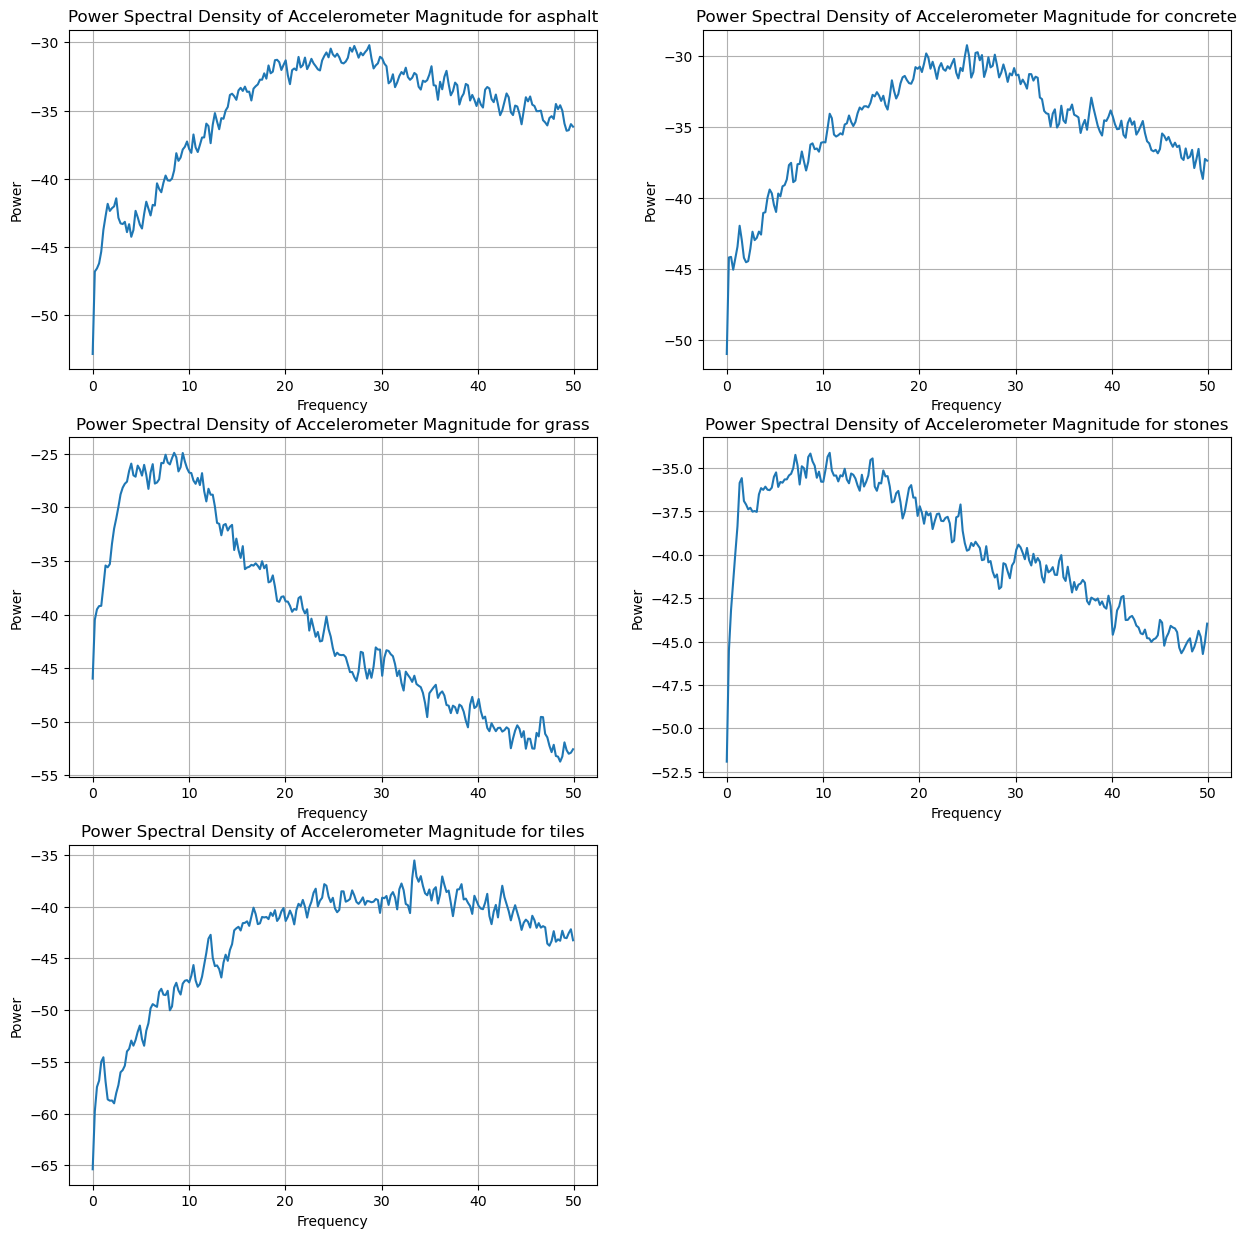

In [74]:
plt.figure(figsize=(15, 15))
accel_full_peak_power = {}

for i, (df, surface) in enumerate(zip(full_dfs, surfaces)):
    signal = df["accel_mag"]
    sampling_freq = 100
    frequencies, psd = welch(signal, sampling_freq, nperseg = 449)  # using welch's method calculate PSD with SciPy welch function
    psd_dB = 10 * np.log10(psd)  # convert PSD values to decibels scale
    peak_power = round(np.max(psd_dB), 2)  # find highest value of the PSD in decibels and round to 2 decimal places
    peak_power_freq = round(frequencies[np.argmax(psd_dB)])  # find the corresponding frequency ar peak power and also round it
    accel_full_peak_power[surface] = (peak_power, peak_power_freq)
    plt.subplot(3, 2, i + 1)
    plt.grid(True)
    plt.plot(frequencies, psd_dB)
    plt.title(f"Power Spectral Density of Accelerometer Magnitude for {surface}")
    plt.ylabel("Power")
    plt.xlabel("Frequency")
plt.show()

#### Peak Power (Acceleration Magnitude) for full data set

In [75]:
for surface in surfaces:
    print(f"The peak power for {surface} accelerometer magnitude is {accel_full_peak_power[surface][0]} at {accel_full_peak_power[surface][1]} Hz")

The peak power for asphalt accelerometer magnitude is -30.2 at 29 Hz
The peak power for concrete accelerometer magnitude is -29.24 at 25 Hz
The peak power for grass accelerometer magnitude is -24.92 at 8 Hz
The peak power for stones accelerometer magnitude is -34.12 at 11 Hz
The peak power for tiles accelerometer magnitude is -35.54 at 33 Hz


### Gyroscope Magnitude

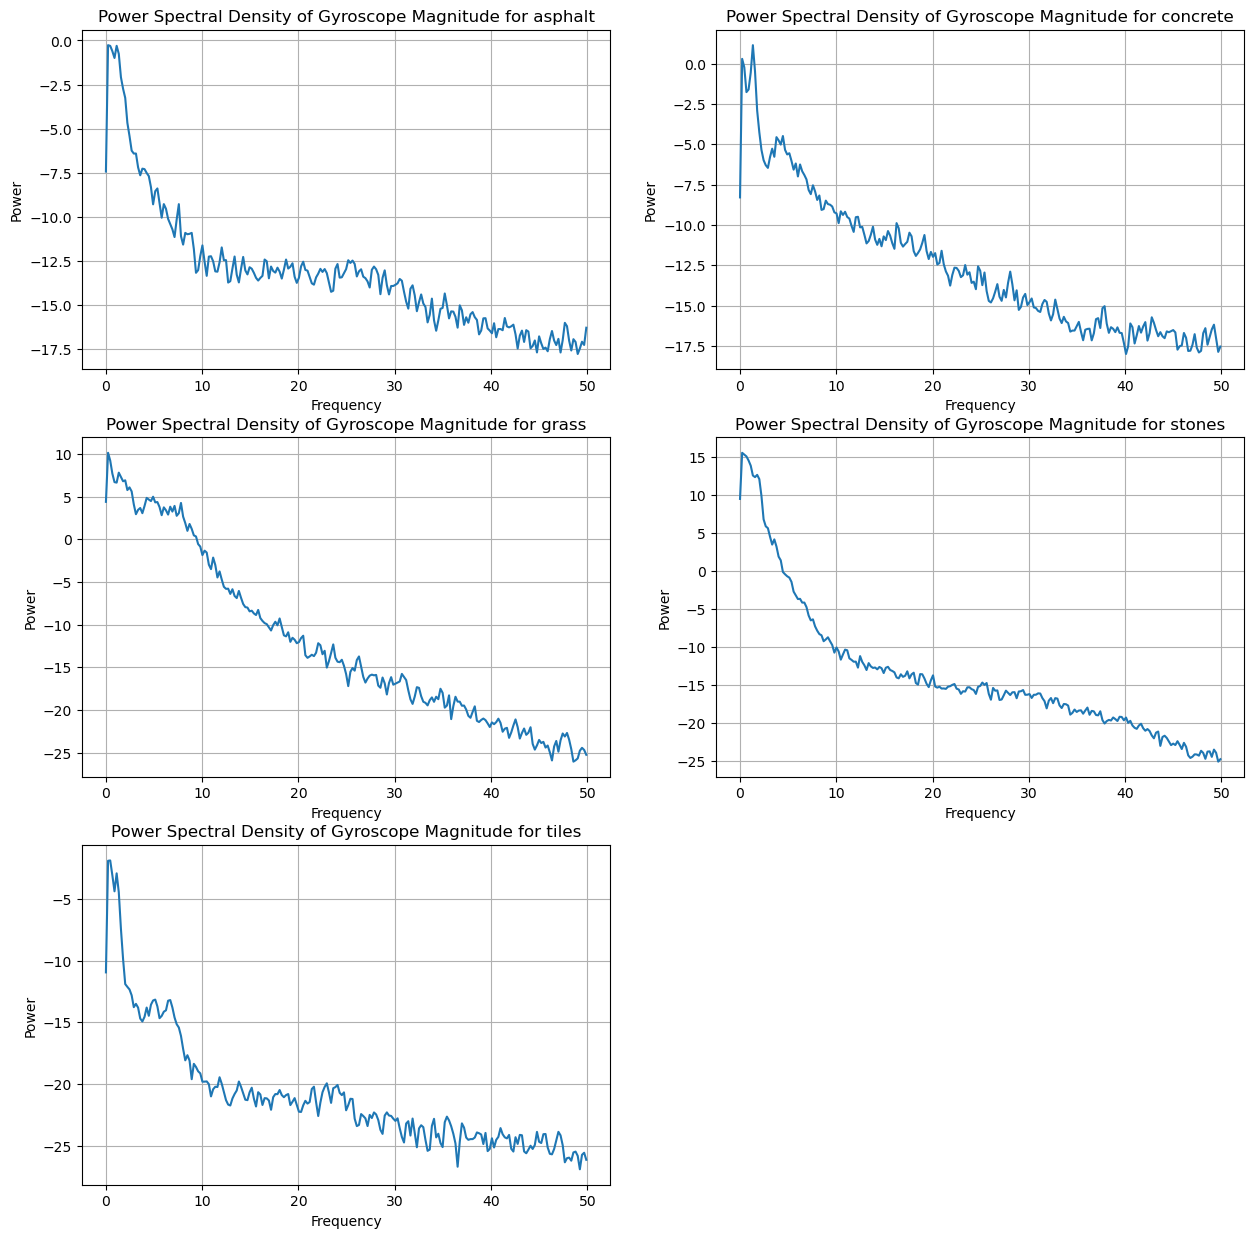

In [76]:
plt.figure(figsize=(15, 15))
gyro_full_peak_power = {}

for i, (df, surface) in enumerate(zip(full_dfs, surfaces)):
    signal = df["gyro_mag"]
    sampling_freq = 100
    frequencies, psd = welch(signal, sampling_freq, nperseg = 449)  # using welch's method calculate PSD with SciPy welch function
    psd_dB = 10 * np.log10(psd)  # convert PSD values to decibels scale
    peak_power = round(np.max(psd_dB), 2)  # find highest value of the PSD in decibels and round to 2 decimal places
    peak_power_freq = round(frequencies[np.argmax(psd_dB)])  # find the corresponding frequency ar peak power and also round it
    gyro_full_peak_power[surface] = (peak_power, peak_power_freq)
    plt.subplot(3, 2, i + 1)
    plt.grid(True)
    plt.plot(frequencies, psd_dB)
    plt.title(f"Power Spectral Density of Gyroscope Magnitude for {surface}")
    plt.ylabel("Power")
    plt.xlabel("Frequency")
plt.show()

#### Peak Power (Gyroscope Magnitude) for full data sets

In [77]:
for surface in surfaces:
    print(f"The peak power for {surface} gyroscope magnitude is {gyro_full_peak_power[surface][0]} at {gyro_full_peak_power[surface][1]} Hz")

The peak power for asphalt gyroscope magnitude is -0.27 at 0 Hz
The peak power for concrete gyroscope magnitude is 1.14 at 1 Hz
The peak power for grass gyroscope magnitude is 10.14 at 0 Hz
The peak power for stones gyroscope magnitude is 15.55 at 0 Hz
The peak power for tiles gyroscope magnitude is -1.87 at 0 Hz
